<a href="https://colab.research.google.com/github/pawljmlo/p2p-online-interactions/blob/main/scoping-review-analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# old

In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

from matplotlib import pyplot as plt

import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving disorders.csv to disorders.csv
User uploaded file "disorders.csv" with length 125 bytes


In [ ]:
df = pd.read_csv('dawid-phd-data-extracted.csv')
df.head()

Kolumna1  emotional/empathy/understanding  ...    original     changed
0  Andalibi 2017                                1  ...  depression  depression
1    Barney 2011                                0  ...  depression  depression
2      Beck 2016                                1  ...  depression  depression
3      Bronstein                                0  ...         OCD         OCD
4     Brown 2014                                0  ...      opioid      opioid

[5 rows x 56 columns]

## all

In [ ]:
X = df.drop(['Kolumna1', 'Choroba', 'original', 'changed'], axis=1).values
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
kmeans.labels_

array([5, 0, 3, 0, 0, 1, 1, 3, 3, 1, 0, 2, 2, 5, 0, 5, 0, 1, 1, 1, 5, 0,
       1, 2, 6, 6, 6, 5, 5, 5, 2, 2, 0, 0, 7, 2, 5, 5, 4, 4], dtype=int32)

In [ ]:
y = df['Choroba'].values
y

array([1, 1, 1, 2, 4, 4, 6, 8, 5, 1, 8, 6, 8, 4, 1, 6, 1, 6, 6, 1, 4, 6,
       1, 4, 1, 3, 8, 1, 2, 2, 2, 8, 8, 8, 6, 4, 6, 6, 1, 2])

In [ ]:
col_names = df.drop(['Kolumna1', 'Choroba', 'original', 'changed'], axis=1).columns
class_names = ['1','2','3','4','5','6','8']

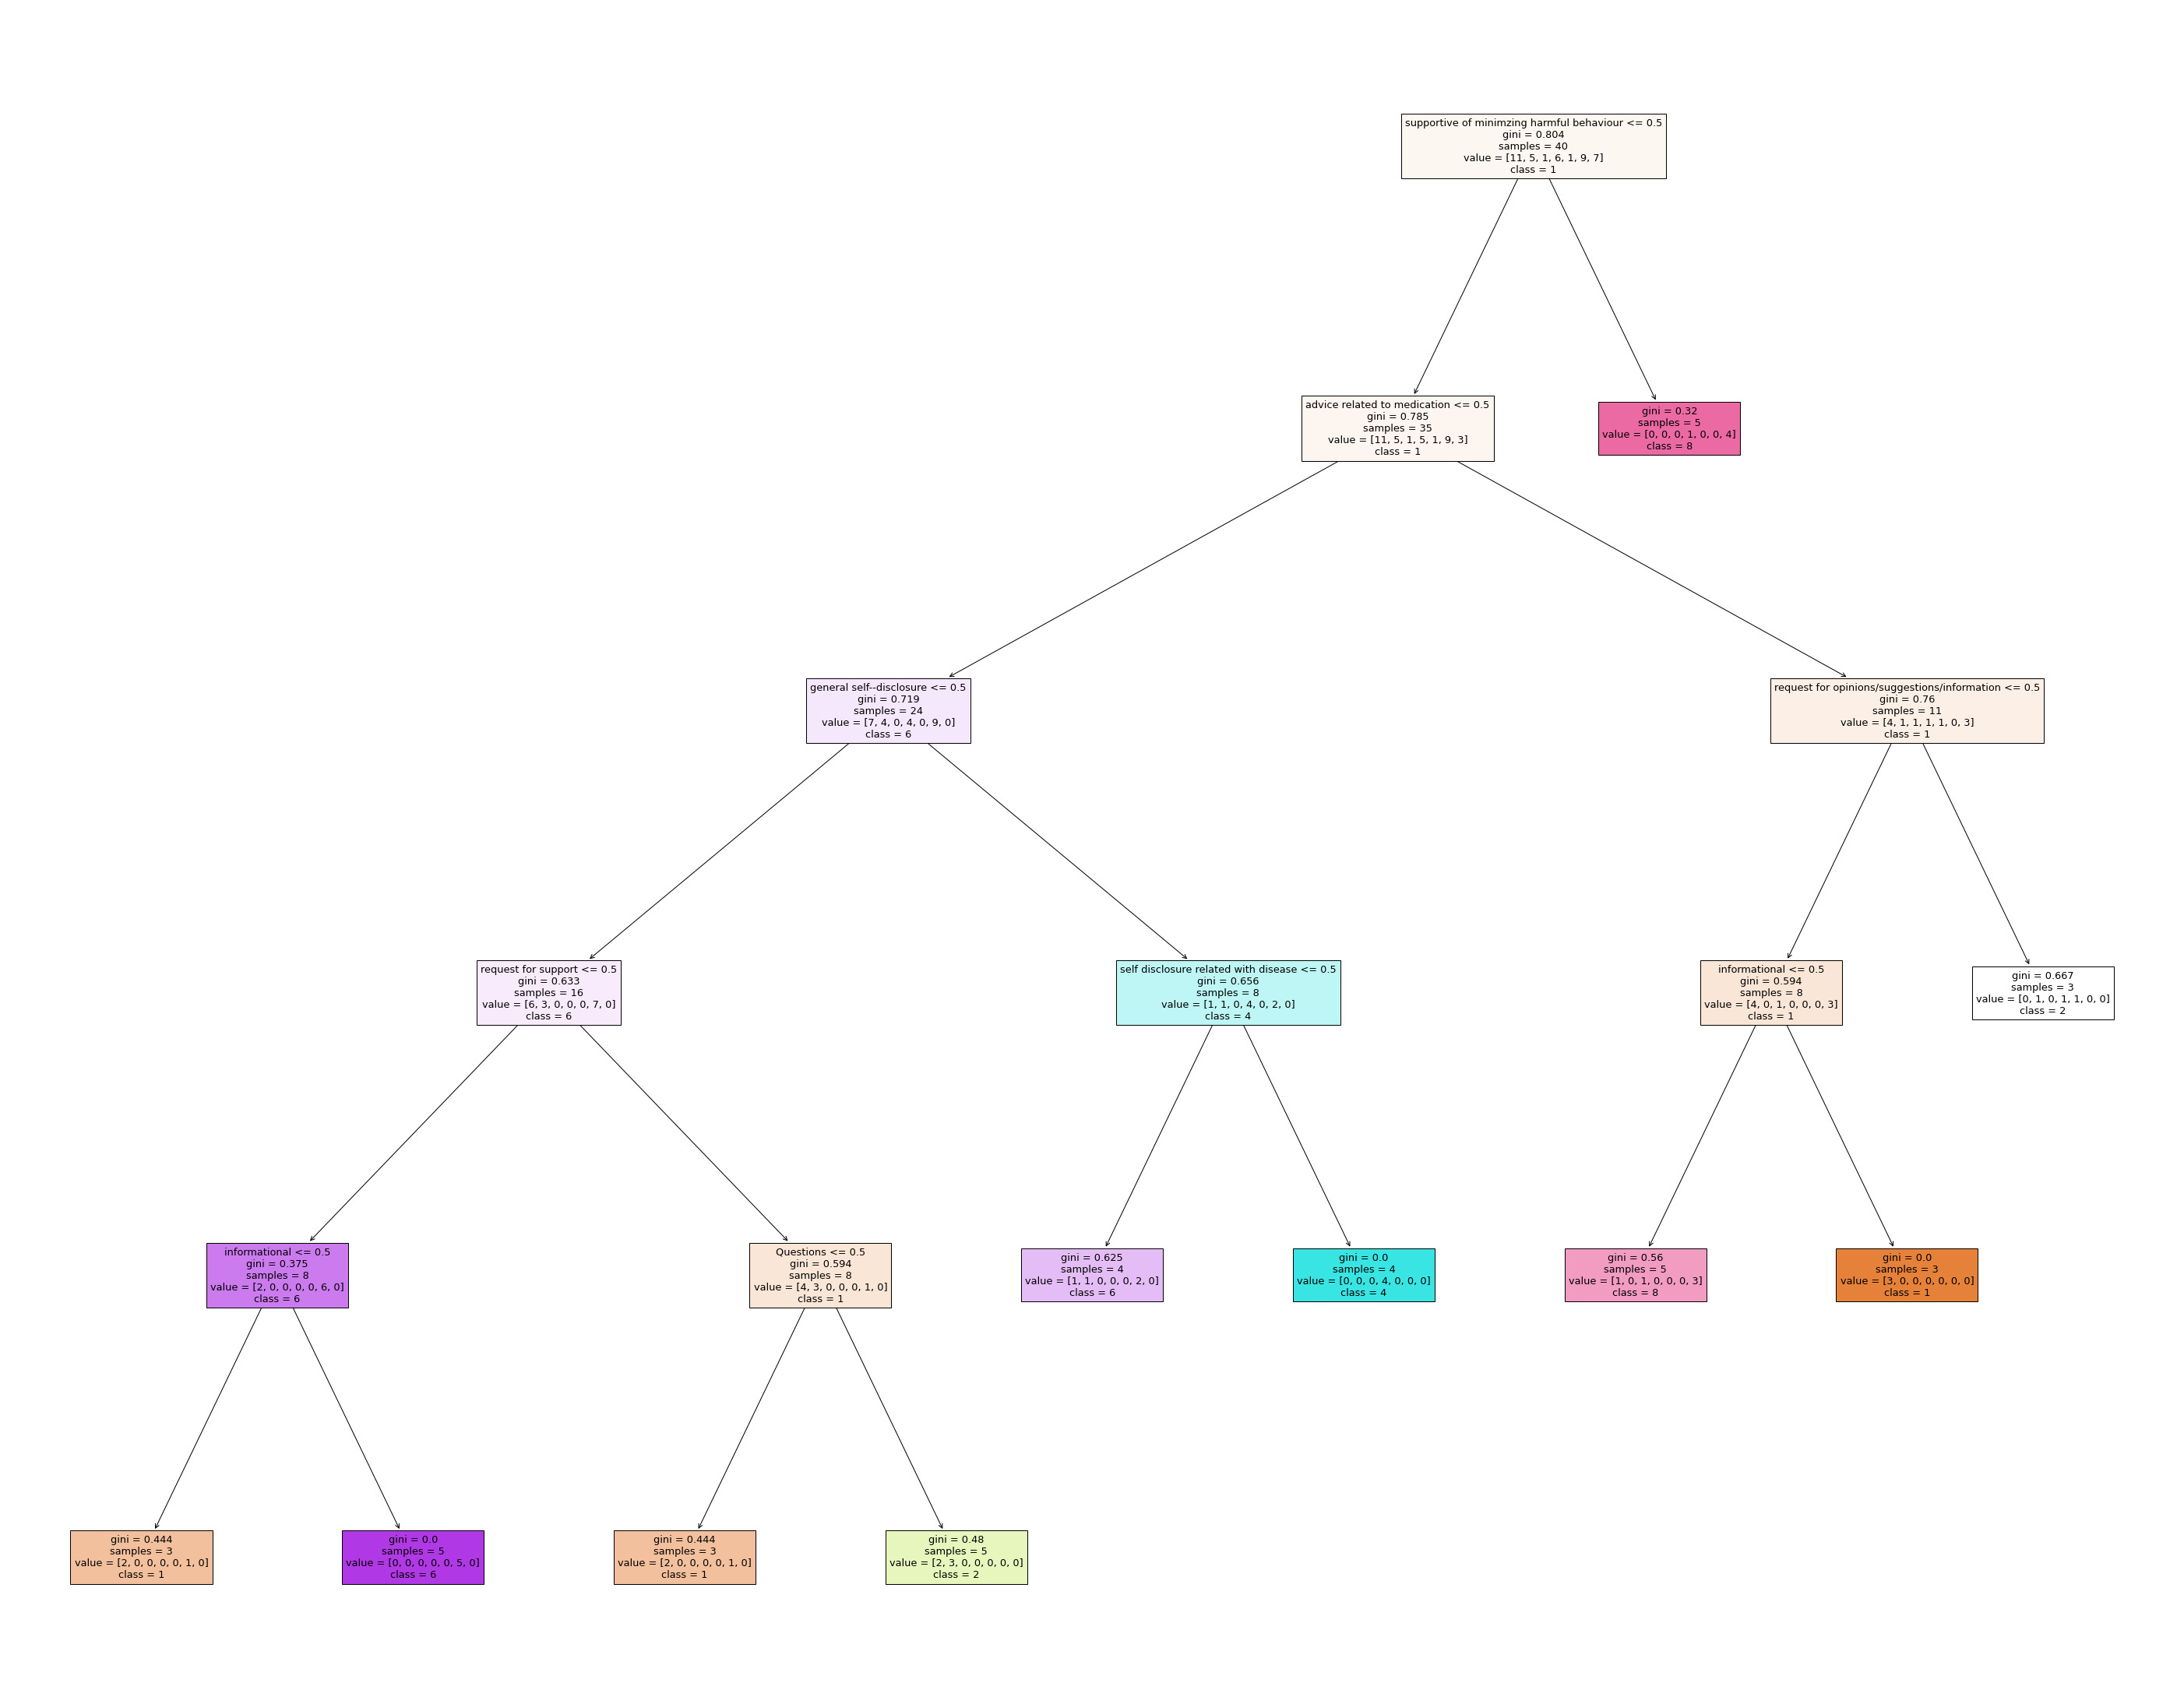

In [ ]:
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=3)
clf = clf.fit(X, y)

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf, 
                   feature_names=col_names,  
                   class_names=class_names,
                   filled=True)

## selected

In [ ]:
df_select = df[(df['Choroba'] != 3) & (df['Choroba'] != 5)]
df_select.head()

Kolumna1  emotional/empathy/understanding  ...    original     changed
0  Andalibi 2017                                1  ...  depression  depression
1    Barney 2011                                0  ...  depression  depression
2      Beck 2016                                1  ...  depression  depression
3      Bronstein                                0  ...         OCD         OCD
4     Brown 2014                                0  ...      opioid      opioid

[5 rows x 56 columns]

In [ ]:
X_selected = df_select.drop(['Kolumna1', 'Choroba', 'original', 'changed'], axis=1).values
kmeans = KMeans(n_clusters=8, random_state=0).fit(X_selected)
kmeans.labels_

array([4, 5, 3, 5, 5, 4, 5, 3, 3, 7, 3, 0, 4, 5, 3, 5, 3, 5, 5, 4, 5, 7,
       6, 1, 1, 4, 4, 4, 3, 0, 0, 0, 4, 0, 7, 7, 2, 2], dtype=int32)

In [ ]:
y_selected = df_select['Choroba'].values
y

array([1, 1, 1, 2, 4, 4, 6, 8, 1, 8, 6, 8, 4, 1, 6, 1, 6, 6, 1, 4, 6, 1,
       4, 1, 8, 1, 2, 2, 2, 8, 8, 8, 6, 4, 6, 6, 1, 2])

In [ ]:
col_names = df.drop(['Kolumna1', 'Choroba', 'original', 'changed'], axis=1).columns
class_names_selected = ['1','2','4','6','8']

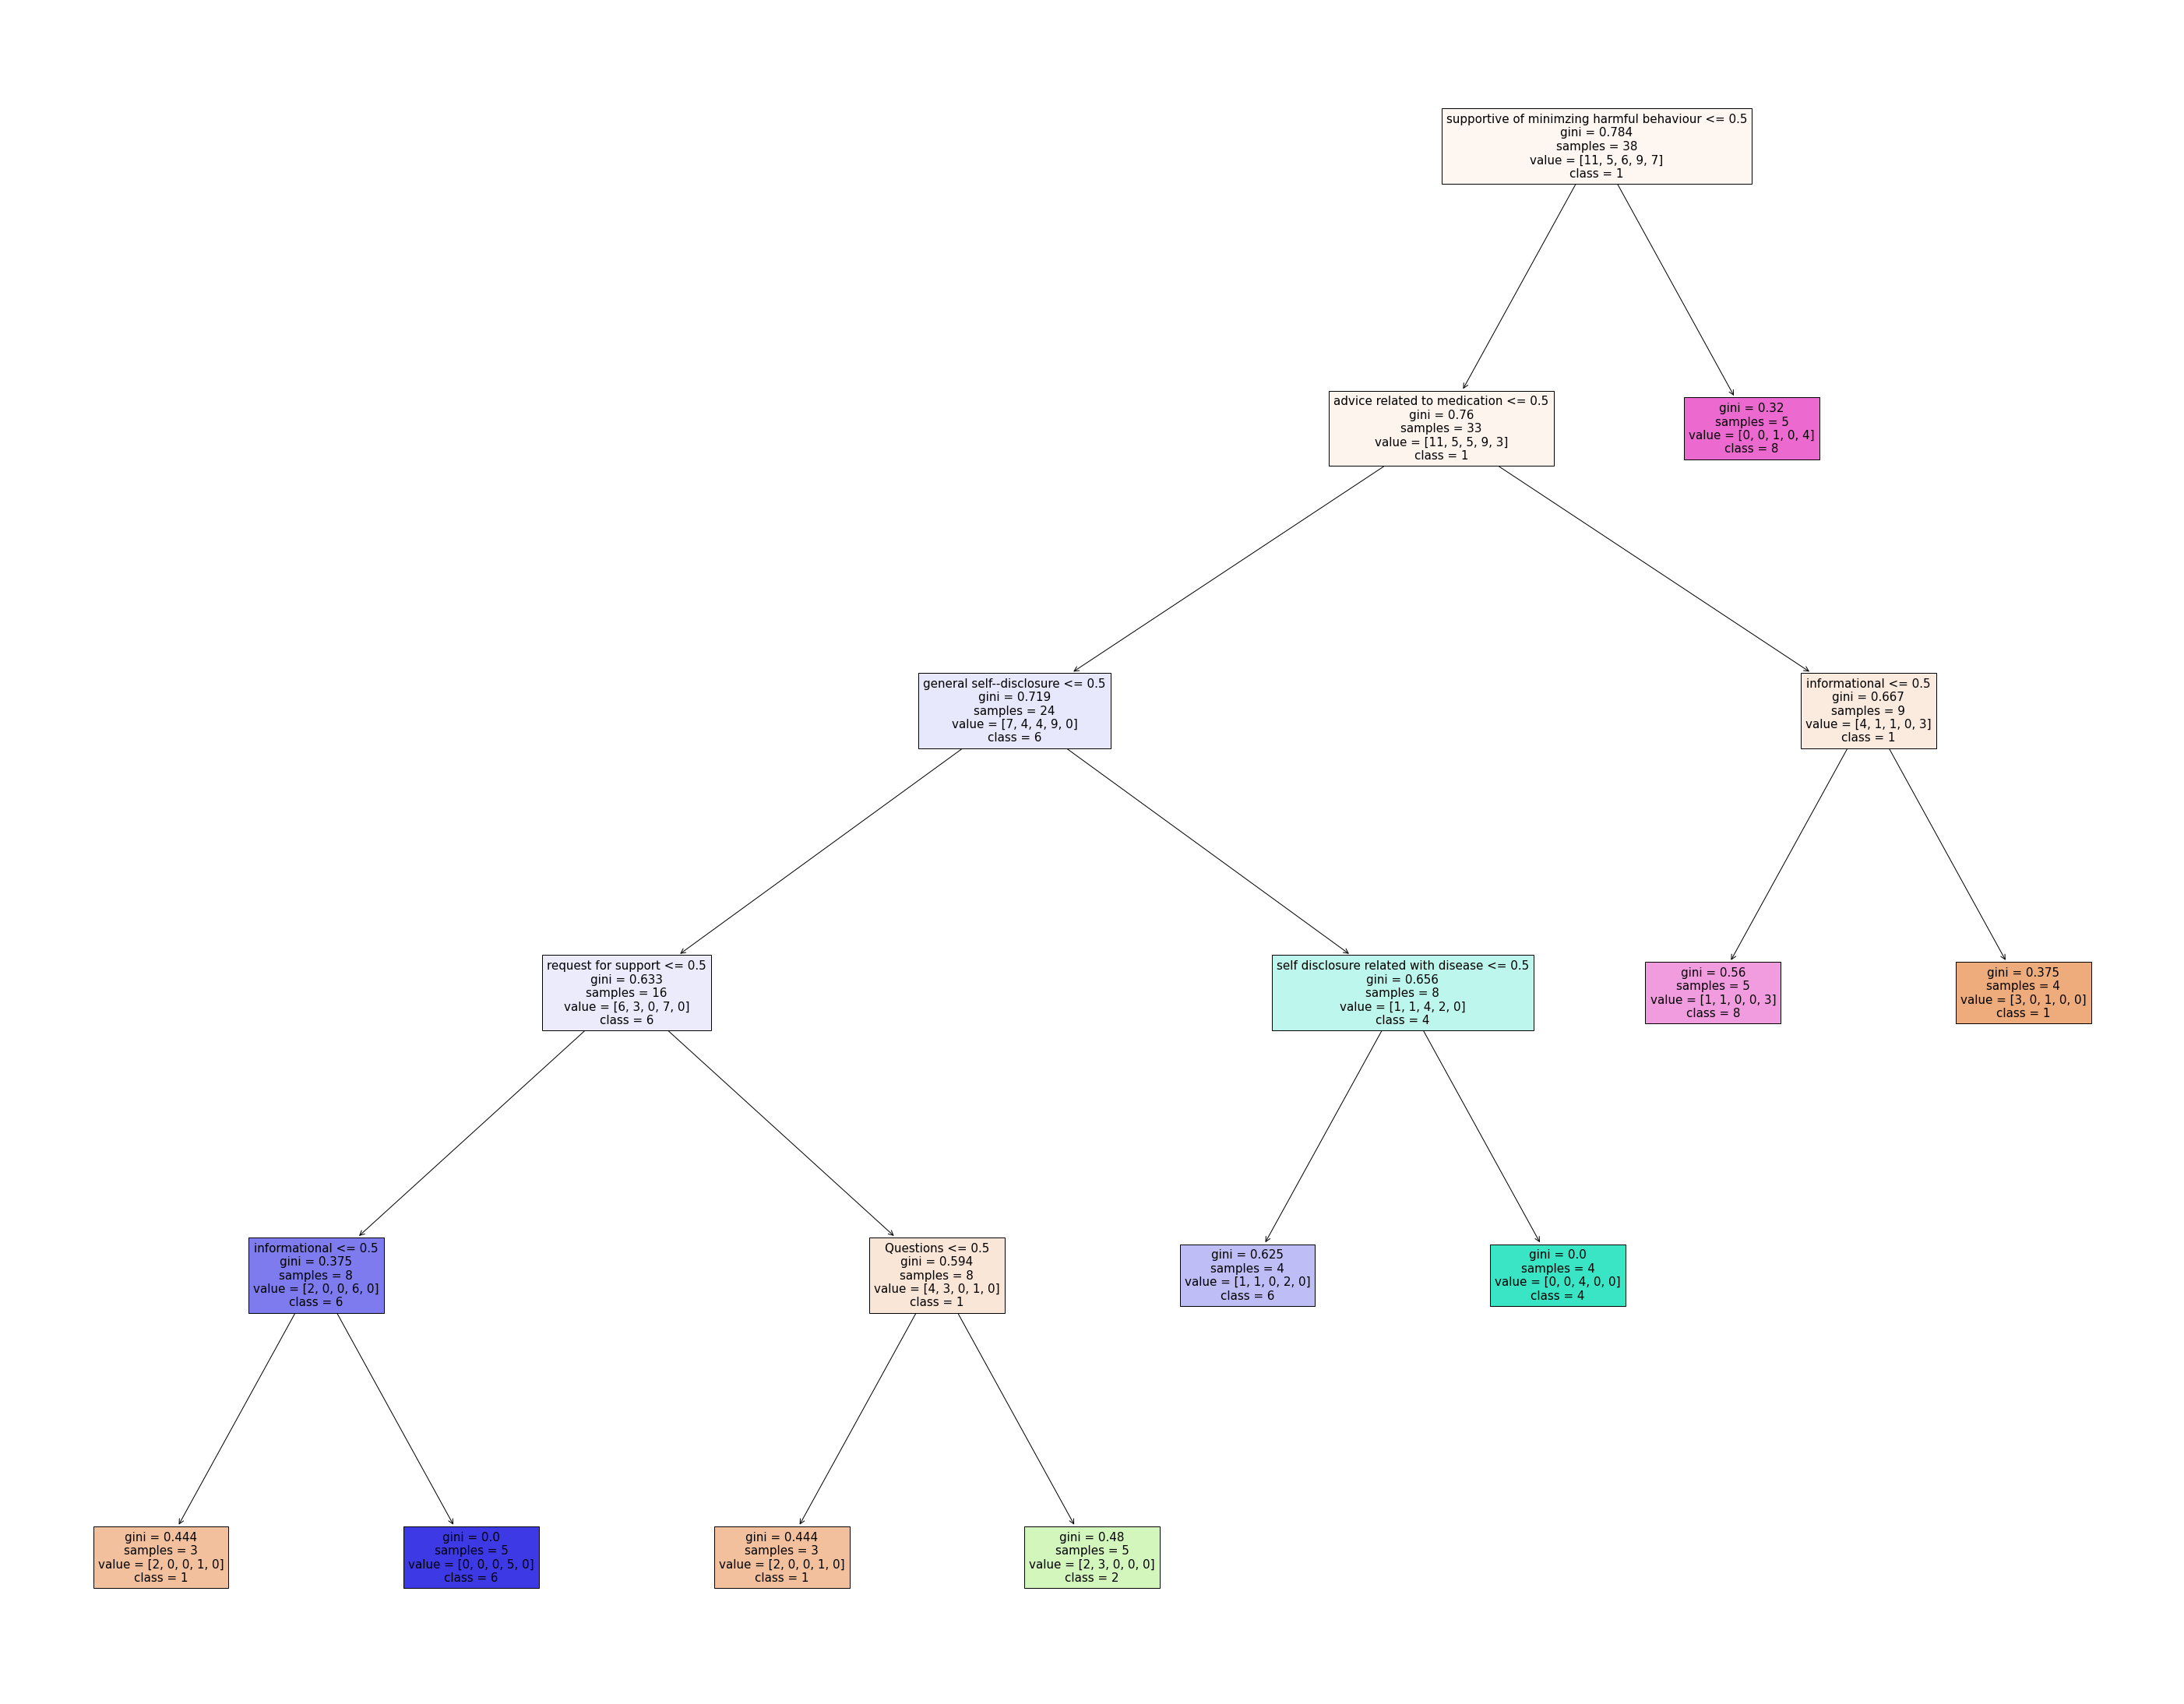

In [ ]:
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=3)
clf = clf.fit(X_selected, y_selected)

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf, 
                   feature_names=col_names,  
                   class_names=class_names_selected,
                   filled=True)

## heatmaps

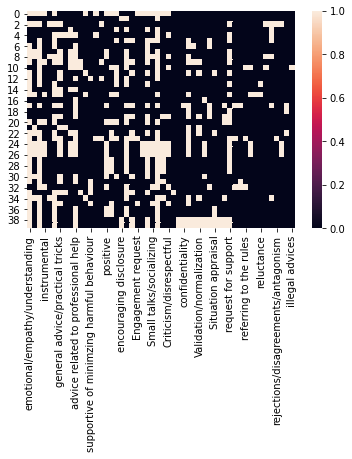

In [ ]:
ax = sns.heatmap(df.drop(['Kolumna1', 'Choroba', 'original', 'changed'], axis=1))

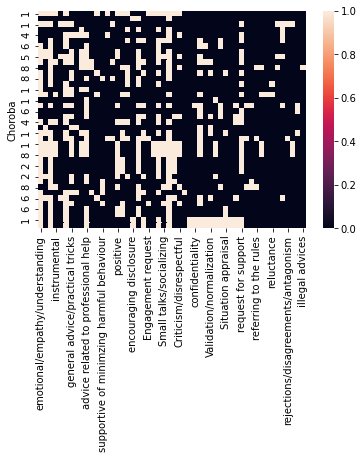

In [ ]:
ax = sns.heatmap(df.drop(['Kolumna1', 'original', 'changed'], axis=1).set_index('Choroba'))

In [ ]:
df_grouped = df.drop(['Kolumna1', 'original', 'changed'], axis=1).groupby('Choroba').sum()
df_grouped 

emotional/empathy/understanding  esteem  ...  unhelpful  illegal advices
Choroba                                           ...                            
1                                      8       4  ...          1                0
2                                      4       1  ...          0                0
3                                      1       1  ...          0                0
4                                      4       0  ...          0                0
5                                      1       1  ...          0                0
6                                      7       3  ...          2                0
8                                      5       2  ...          0                1

[7 rows x 52 columns]

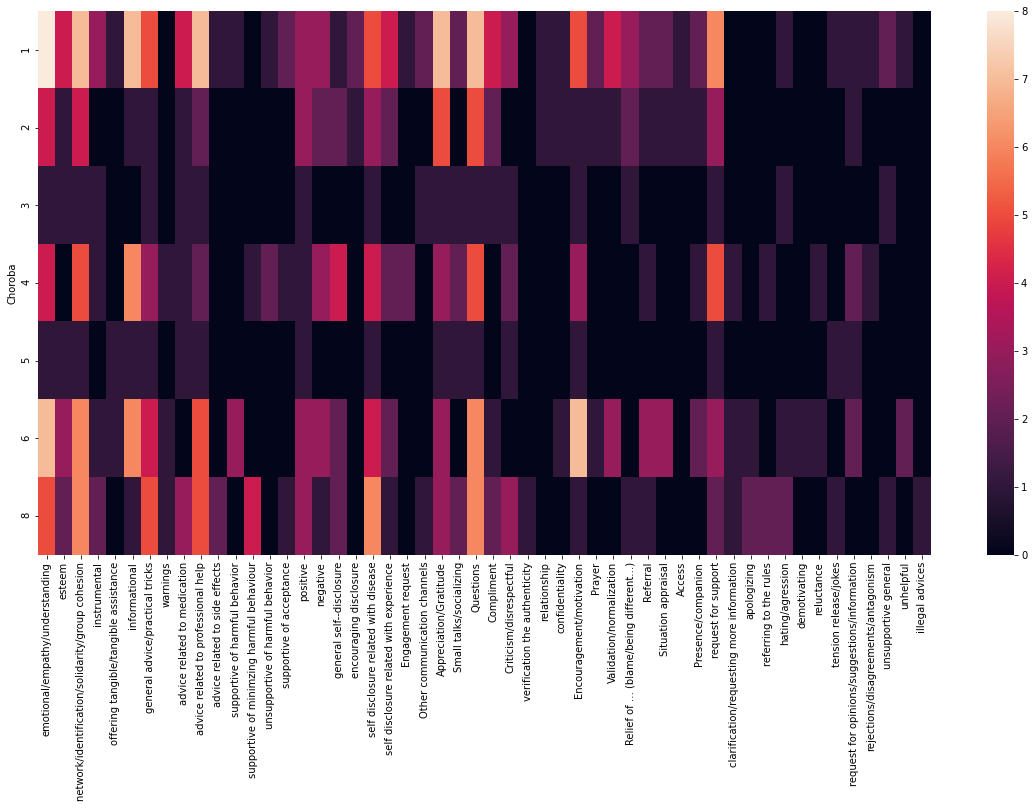

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_grouped)

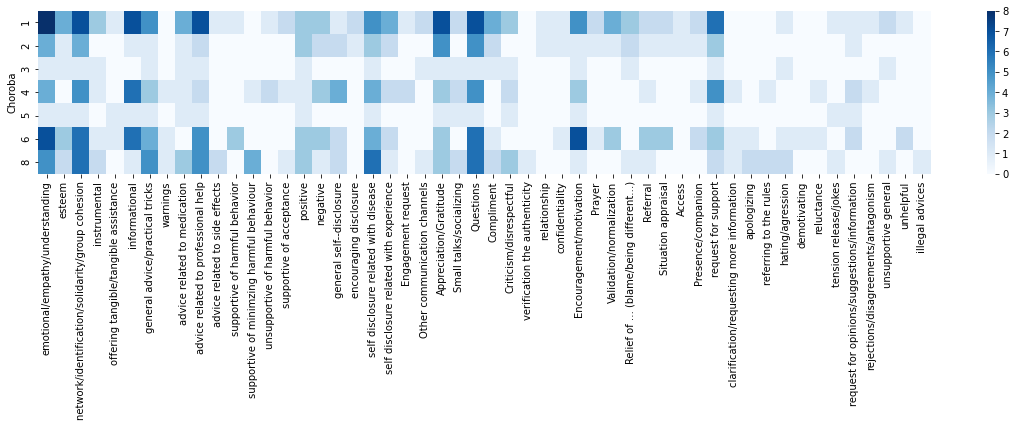

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
ax = sns.heatmap(df_grouped, cmap="Blues")

In [ ]:
df_grouped_mean = df.drop(['Kolumna1', 'original', 'changed'], axis=1).groupby('Choroba').mean()

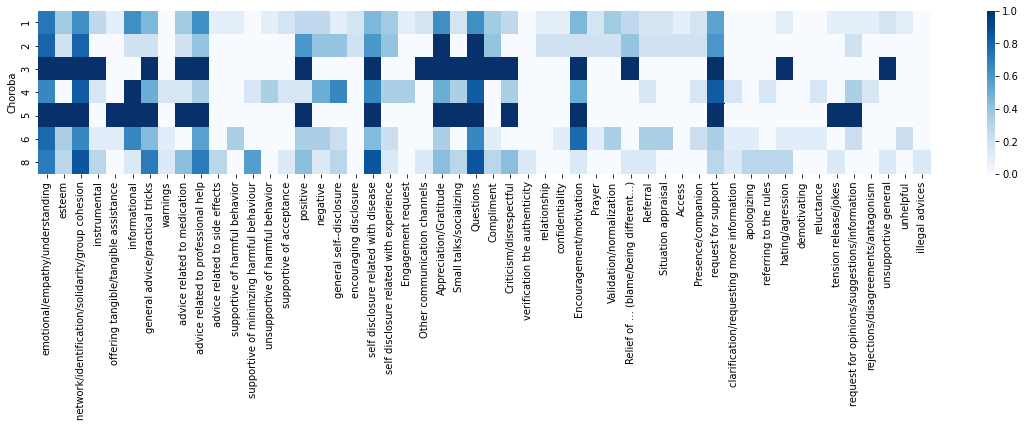

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
ax = sns.heatmap(df_grouped_mean, cmap="Blues")

In [ ]:
df_exluded = df[(df['Choroba'] != 3) & (df['Choroba'] != 5)]
df_exluded_mean = df_exluded.drop(['Kolumna1', 'original', 'changed'], axis=1).groupby('Choroba').mean()

In [ ]:
df_exluded_mean

emotional/empathy/understanding    esteem  ...  unhelpful  illegal advices
Choroba                                             ...                            
1                               0.727273  0.363636  ...   0.090909         0.000000
2                               0.800000  0.200000  ...   0.000000         0.000000
4                               0.666667  0.000000  ...   0.000000         0.000000
6                               0.777778  0.333333  ...   0.222222         0.000000
8                               0.714286  0.285714  ...   0.000000         0.142857

[5 rows x 52 columns]

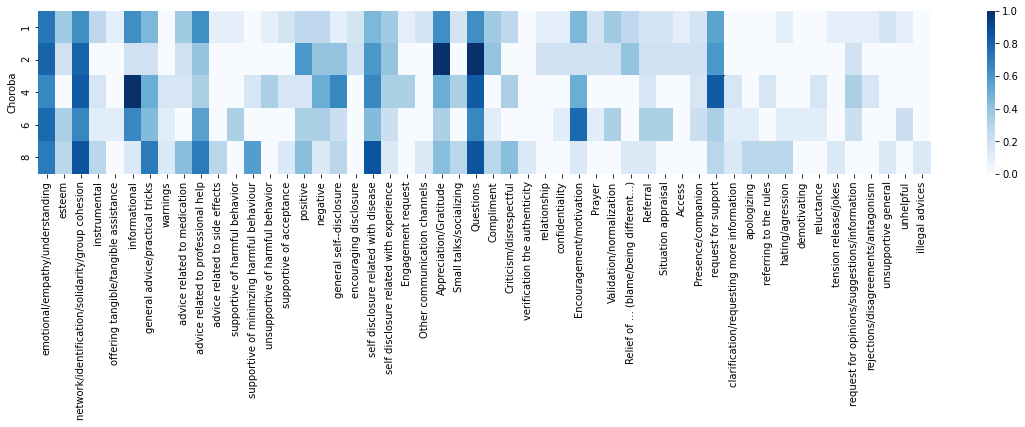

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
ax = sns.heatmap(df_exluded_mean, cmap="Blues")

# new

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
!pip freeze | grep scikit

scikit-image==0.18.3
scikit-learn==1.0.2


In [4]:
sns.color_palette("Set2", 9)[5] # żółty
sns.color_palette()[4] #red
sns.color_palette("husl", 9)[3] #zielony
sns.color_palette("husl", 9)[6] #niebieski

(0.23299120924703914, 0.639586552066035, 0.9260706093977744)

In [9]:
path_codes = "/content/drive/MyDrive/Badania/2, Aktualne/P2P, Online interactions/ScR/scoping-review-data-analyses/data-p2p/v3/codes.csv"
path_casp_single = "/content/drive/MyDrive/Badania/2, Aktualne/P2P, Online interactions/ScR/scoping-review-data-analyses/data-p2p/v3/casp-single-studies.csv"
path_casp_items = "/content/drive/MyDrive/Badania/2, Aktualne/P2P, Online interactions/ScR/scoping-review-data-analyses/data-p2p/v3/casp-items.csv"
path_graph_color = "/content/drive/MyDrive/Badania/2, Aktualne/P2P, Online interactions/ScR/scoping-review-data-analyses/data-p2p/v3/graph-colors.csv"

## heatmaps

In [23]:
df_heatmap = pd.read_csv(path_codes, sep=';')
df_heatmap.head()

ID  Instrumental  Tangible  Informational  Practical tricks  \
0   Andalibi 2017             1         0              1                 0   
1     Barney 2011             0         0              0                 0   
2       Beck 2016             0         1              1                 1   
3  Bronstein 2014             0         0              0                 0   
4      Brown 2014             0         0              1                 1   

   Warnings  Related to medication  Related to professional help  \
0         0                      0                             0   
1         0                      0                             0   
2         0                      0                             0   
3         0                      1                             0   
4         1                      1                             1   

   Related to side effects  Acceptance  ...  Sarcastic comments  Disagreement  \
0                        0           0  ...                   0             0   
1                        0           0  ...                   0             0   
2                        0           1  ...                   1             1   
3                        0           0  ...                   0             0   
4                        0           0  ...                   0             0   

   Rejection  Illness-num  disorders-original      disorders-v1  \
0          0            1          depression        depression   
1          0            1          depression        depression   
2          0            1          depression        depression   
3          0            2                 OCD               OCD   
4          1            4              opioid  opioid addiction   

             disorders-v2       disorders-v3  disorders-v4  disorders-v5  
0  depression and bipolar  depression and BD    depression           DEP  
1  depression and bipolar  depression and BD    depression           DEP  
2  depression and bipolar  depression and BD    depression           DEP  
3                     OCD                OCD           OCD           OCD  
4              addictions         addictions    addictions           PSU  

[5 rows x 50 columns]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5]),
 <a list of 88 Text major ticklabel objects>)

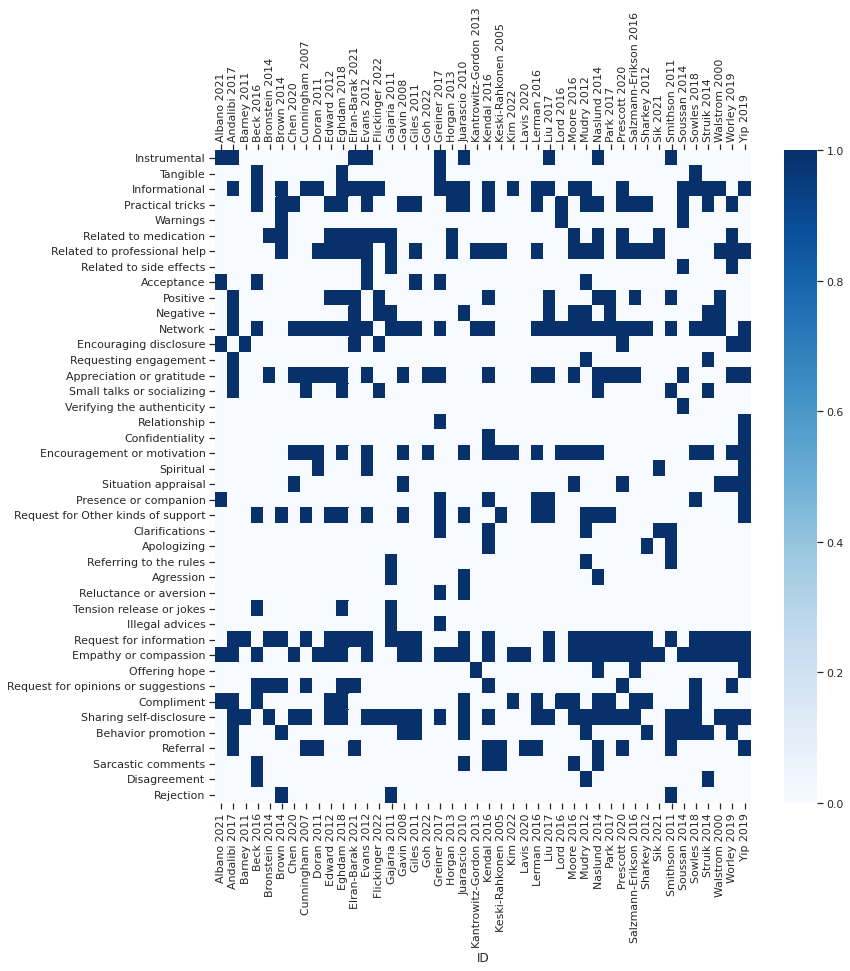

In [24]:
sns.set(font_scale=1, style='white')

fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(df_heatmap.drop(['Illness-num'], axis=1).groupby('ID').mean().transpose(), cmap="Blues")

plt.tick_params(axis='both', which='major', labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)

#### grouped by disorders (means, sums)

In [17]:
df_heatmap_changed = df_heatmap.drop(["ID", 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'Illness-num'], axis=1).groupby('disorders-v5').mean().transpose()

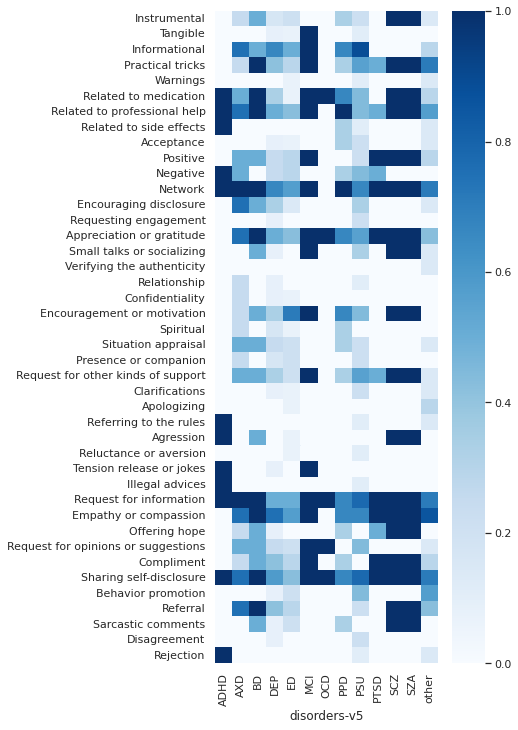

In [18]:
fig, ax = plt.subplots(figsize=(5, 12))
ax = sns.heatmap(df_heatmap_changed, cmap="Blues")

#### grouped by disorders (means, sums) - labels above and below

In [38]:
df_heatmap_new = df_heatmap.drop(["ID", 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'Illness-num'], axis=1).groupby('disorders-v5').mean().transpose()

In [46]:
df_heatmap_new = df_heatmap_new[['ADHD', 'AXD', 'BD', 'DEP', 'ED', 'MCI', 'OCD', 'PPD', 'PSU', 'PTSD', 'SCZ', 'SZA', 'Other']]

In [29]:
df_heatmap_new.index = pd.CategoricalIndex(df_heatmap_new.index, categories= ["ADHD", "AXD", "BD", "DEP", "ED", "MCI", "OCD", "PPD", "PSU", "PTSD", "SCZ", "SZA", 'Other'])
df_heatmap_new.sort_index(level=0, inplace=True)

[Text(0.5, 248.5, '')]

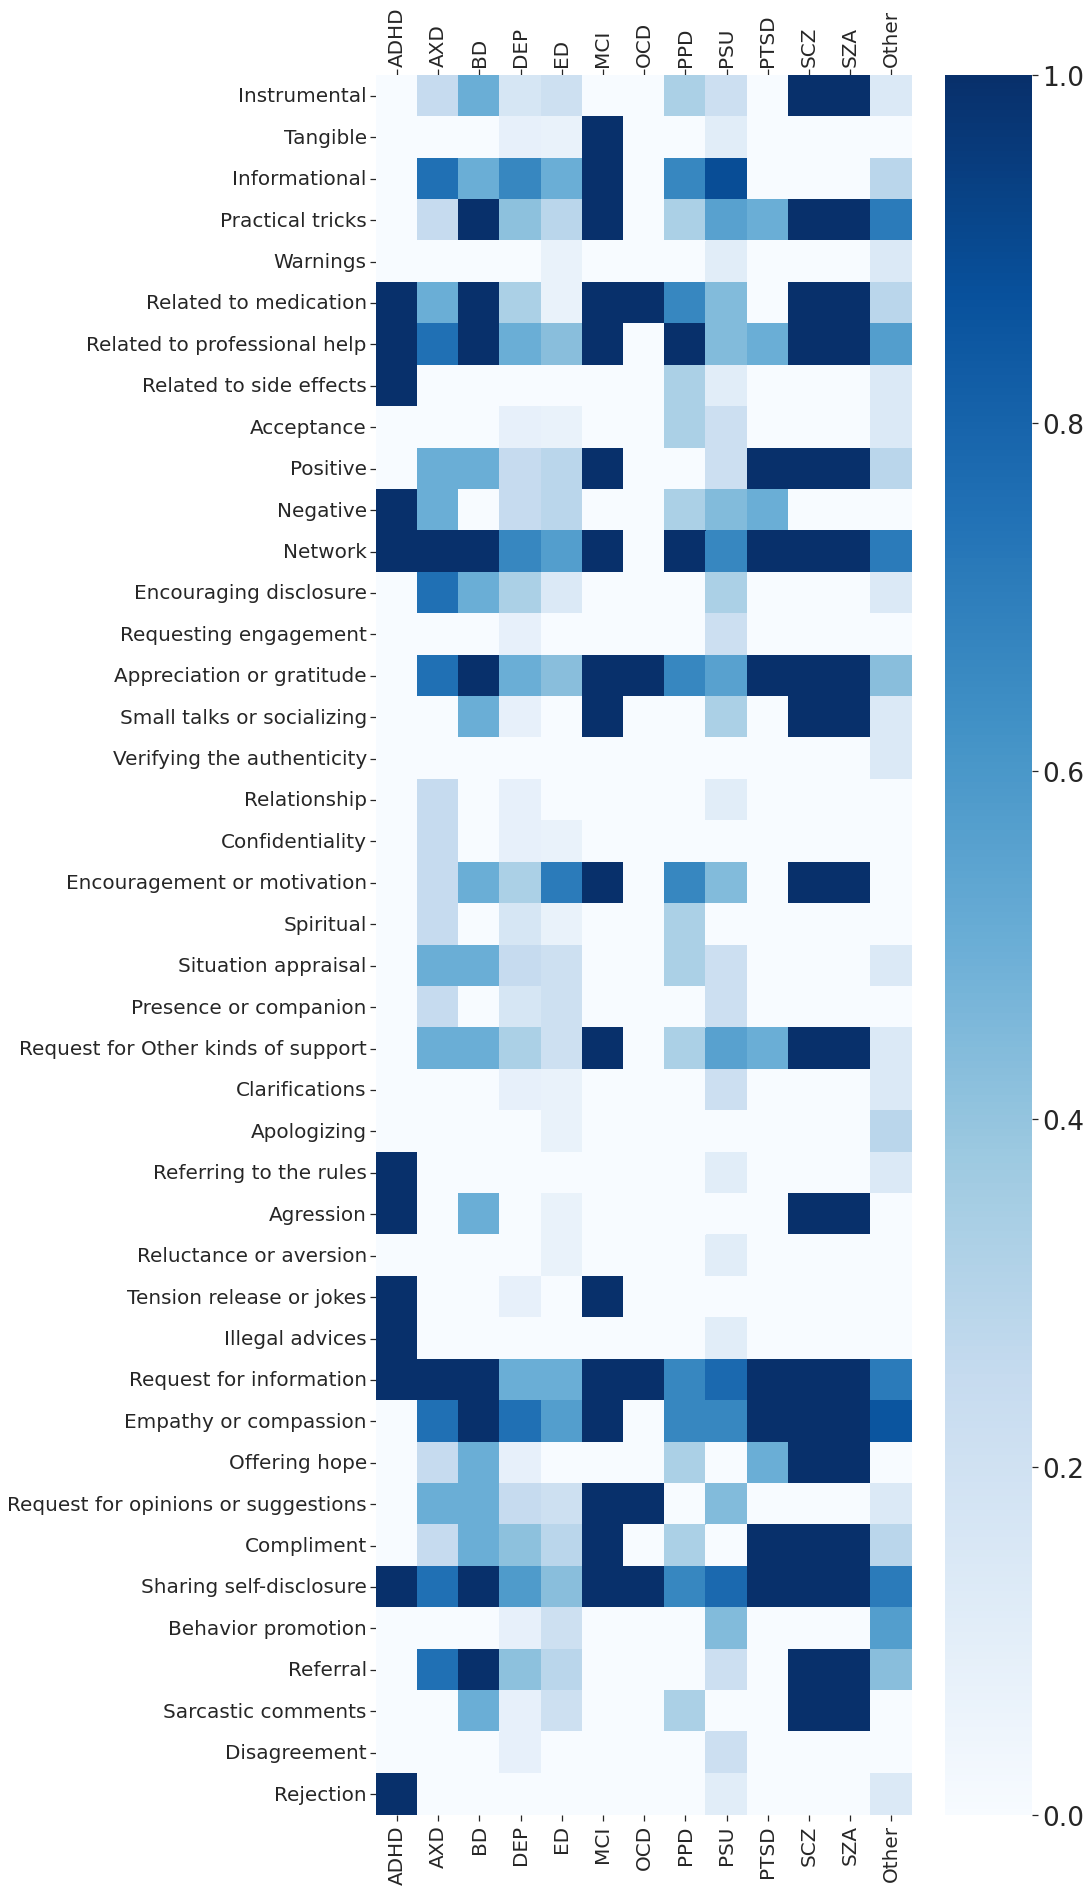

In [54]:
sns.set(font_scale=2.4, style='white')

fig, ax = plt.subplots(figsize=(12, 32))
ax = sns.heatmap(df_heatmap_new, cmap="Blues")

# fig.legend_.set_title(None)

plt.tick_params(axis='both', which='major', labelsize=20, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)

ax.set(xlabel=None)

#### all studies without duplicates

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5]),
 <a list of 44 Text major ticklabel objects>)

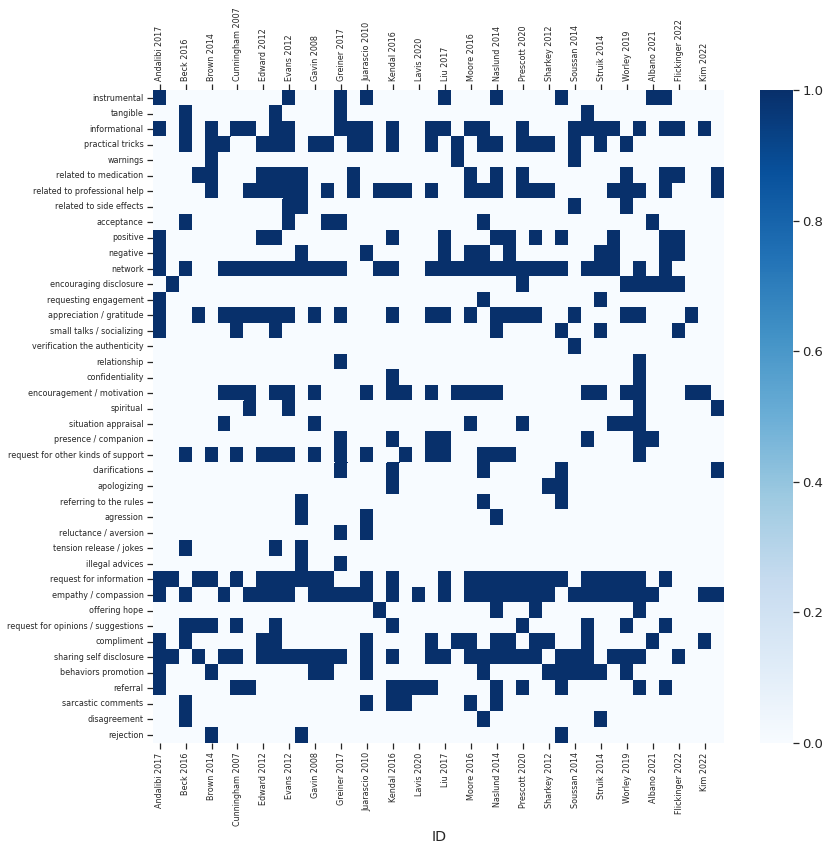

In [ ]:
sns.set(font_scale=1.2, style='white')

fig, ax = plt.subplots(figsize=(12.8, 12))
ax = sns.heatmap(df_heatmap.drop_duplicates(subset=['ID']).set_index('ID').drop(
    ['illness-num', 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5'], axis=1).transpose(), cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)

#### indivual studies (sums, means)

Caution: Walstrom occurrs twice for ED!

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 14 Text major ticklabel objects>)

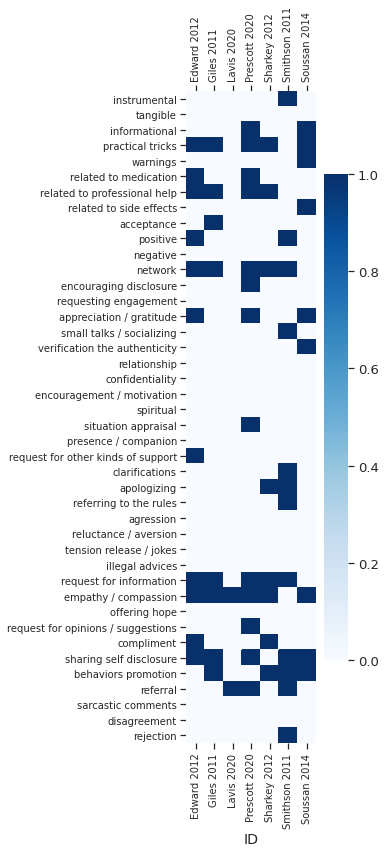

In [ ]:
sns.set(font_scale=1.2, style='white')

fig, ax = plt.subplots(figsize=(2.9, 12))
ax = sns.heatmap(df_heatmap[df_heatmap['disorders-v5']=="other"].set_index('ID').drop(
    ['illness-num', 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5'], axis=1).transpose(), cmap="Blues")
# ax = sns.heatmap(df_heatmap[df_heatmap['disorders-v5']=="ED"].drop_duplicates(subset=['ID']).set_index('ID').drop(
#     ['illness-num', 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5'], axis=1).transpose(), cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90) 

#### disorders as numbers

In [ ]:
df_heatmap_num = df_heatmap.drop(["ID", 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5'], axis=1).groupby('illness-num').sum().transpose()

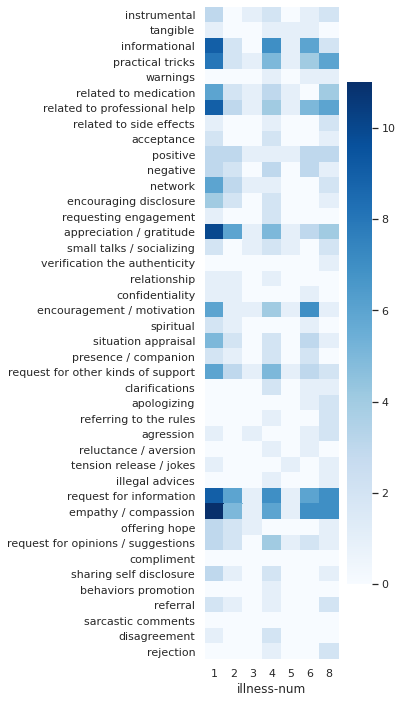

In [ ]:
fig, ax = plt.subplots(figsize=(3, 12))
ax = sns.heatmap(df_heatmap_num, cmap="Blues")

## disorders

In [ ]:
df_disorders = (df_heatmap.groupby('disorders-v5').count()['ID'] / df_heatmap.groupby('disorders-v5').count()['ID'].sum() * 100).to_frame()
df_disorders = df_disorders.reset_index()

df_disorders.columns = ['Disorders', 'Percentage']

df_disorders = df_disorders.sort_values('Percentage', ascending=False)

df_disorders = df_disorders.reset_index(drop=True)

In [ ]:
def shift_row_to_bottom(df, index_to_shift):
  """Shift row, given by index_to_shift, to bottom of df."""
  
  idx = df.index.tolist()
  idx.pop(index_to_shift)
  df = df.reindex(idx + [index_to_shift])
  
  return df


def shift_row_to_top(df, index_to_shift):
  """Shift row, given by index_to_shift, to top of df."""
  
  idx = df.index.tolist()
  idx.pop(index_to_shift)
  df = df.reindex([index_to_shift] + idx)
  
  return df

In [ ]:
df_disorders = shift_row_to_bottom(df_disorders, 3)
df_disorders

Disorders  Percentage
0         ED   24.137931
1        DEP   20.689655
2        PSU   15.517241
4        AXD    6.896552
5        PPD    5.172414
6         BD    3.448276
7       PTSD    3.448276
8       ADHD    1.724138
9        MCI    1.724138
10       OCD    1.724138
11       SCZ    1.724138
12       SZA    1.724138
3      other   12.068966

In [ ]:
## from path

# df_illnesses = pd.read_csv('disorders.csv', sep=";", na_filter=False, decimal=",")
# # df_illnesses = df_illnesses.sort_values("percentage", ascending=False)
# df_illnesses

[(0.0, 25.0)]

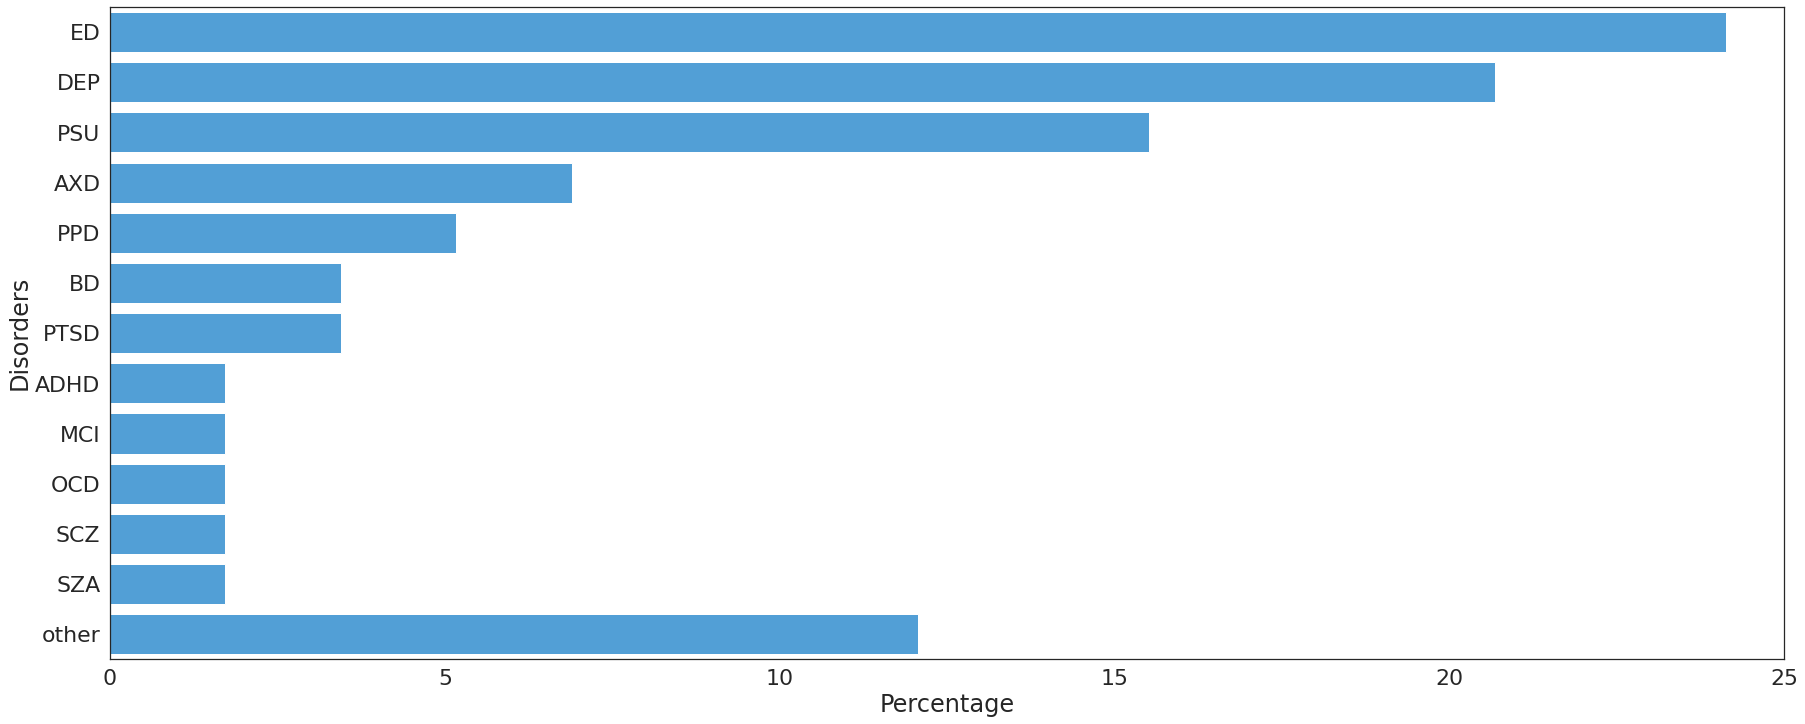

In [ ]:
plt.figure(figsize=(30, 12))
sns.set(font_scale=2, style='white')

ax = sns.barplot(y="Disorders", x="Percentage", data=df_disorders, color=sns.color_palette("husl", 9)[6])
ax.set(xlim=(0,25))

## casp

In [55]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### items

In [56]:
df_casp = pd.read_csv(path_casp_items, na_filter=False)
# df_casp.index = df_casp["Answers"]
# df_casp = df_casp.drop("Answers", axis=1)
df_casp = df_casp.transpose()
df_casp = df_casp.reset_index()

new_header = df_casp.iloc[0] #grab the first row for the header
df_casp = df_casp[1:] #take the data less the header row
df_casp.columns = new_header #set the header row as the df header

df_casp

0  Answers Yes  No Cannot tell N/A
1        1  41   3           0   0
2        2  43   0           1   0
3        3  38   1           5   0
4        4   5   1           3  35
5        5  41   0           3   0
6        6   4   5           3  32
7        7  37   5           2   0
8        8  28   8           6   0
9        9  40   4           0   0
10     10a  44   0           0   0
11     10b  34  10           0   0
12     10c  16  20           0   0

In [57]:
no_studies = 44

In [61]:
df_casp["NA_changed"] = 100
df_casp["No_changed"] = (df_casp["No"] + df_casp["Cannot tell"] + df_casp["Yes"]) * 100/no_studies
df_casp["Cannot tell_changed"] = (df_casp["Cannot tell"] + df_casp["Yes"]) * 100/no_studies
df_casp["Yes_changed"] = df_casp["Yes"] * 100/no_studies

In [62]:
df_casp

0  Answers Yes  No Cannot tell N/A  NA_changed No_changed Can't tell_changed  \
1        1  41   3           0   0         100      100.0          93.181818   
2        2  43   0           1   0         100      100.0              100.0   
3        3  38   1           5   0         100      100.0          97.727273   
4        4   5   1           3  35         100  20.454545          18.181818   
5        5  41   0           3   0         100      100.0              100.0   
6        6   4   5           3  32         100  27.272727          15.909091   
7        7  37   5           2   0         100      100.0          88.636364   
8        8  28   8           6   0         100  95.454545          77.272727   
9        9  40   4           0   0         100      100.0          90.909091   
10     10a  44   0           0   0         100      100.0              100.0   
11     10b  34  10           0   0         100      100.0          77.272727   
12     10c  16  20           0   0         100  81.818182          36.363636   

0  Yes_changed Cannot tell_changed  
1    93.181818           93.181818  
2    97.727273               100.0  
3    86.363636           97.727273  
4    11.363636           18.181818  
5    93.181818               100.0  
6     9.090909           15.909091  
7    84.090909           88.636364  
8    63.636364           77.272727  
9    90.909091           90.909091  
10       100.0               100.0  
11   77.272727           77.272727  
12   36.363636           36.363636

In [63]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [64]:
sns.set(font_scale=2.5, style='white')

[(0.0, 100.0)]

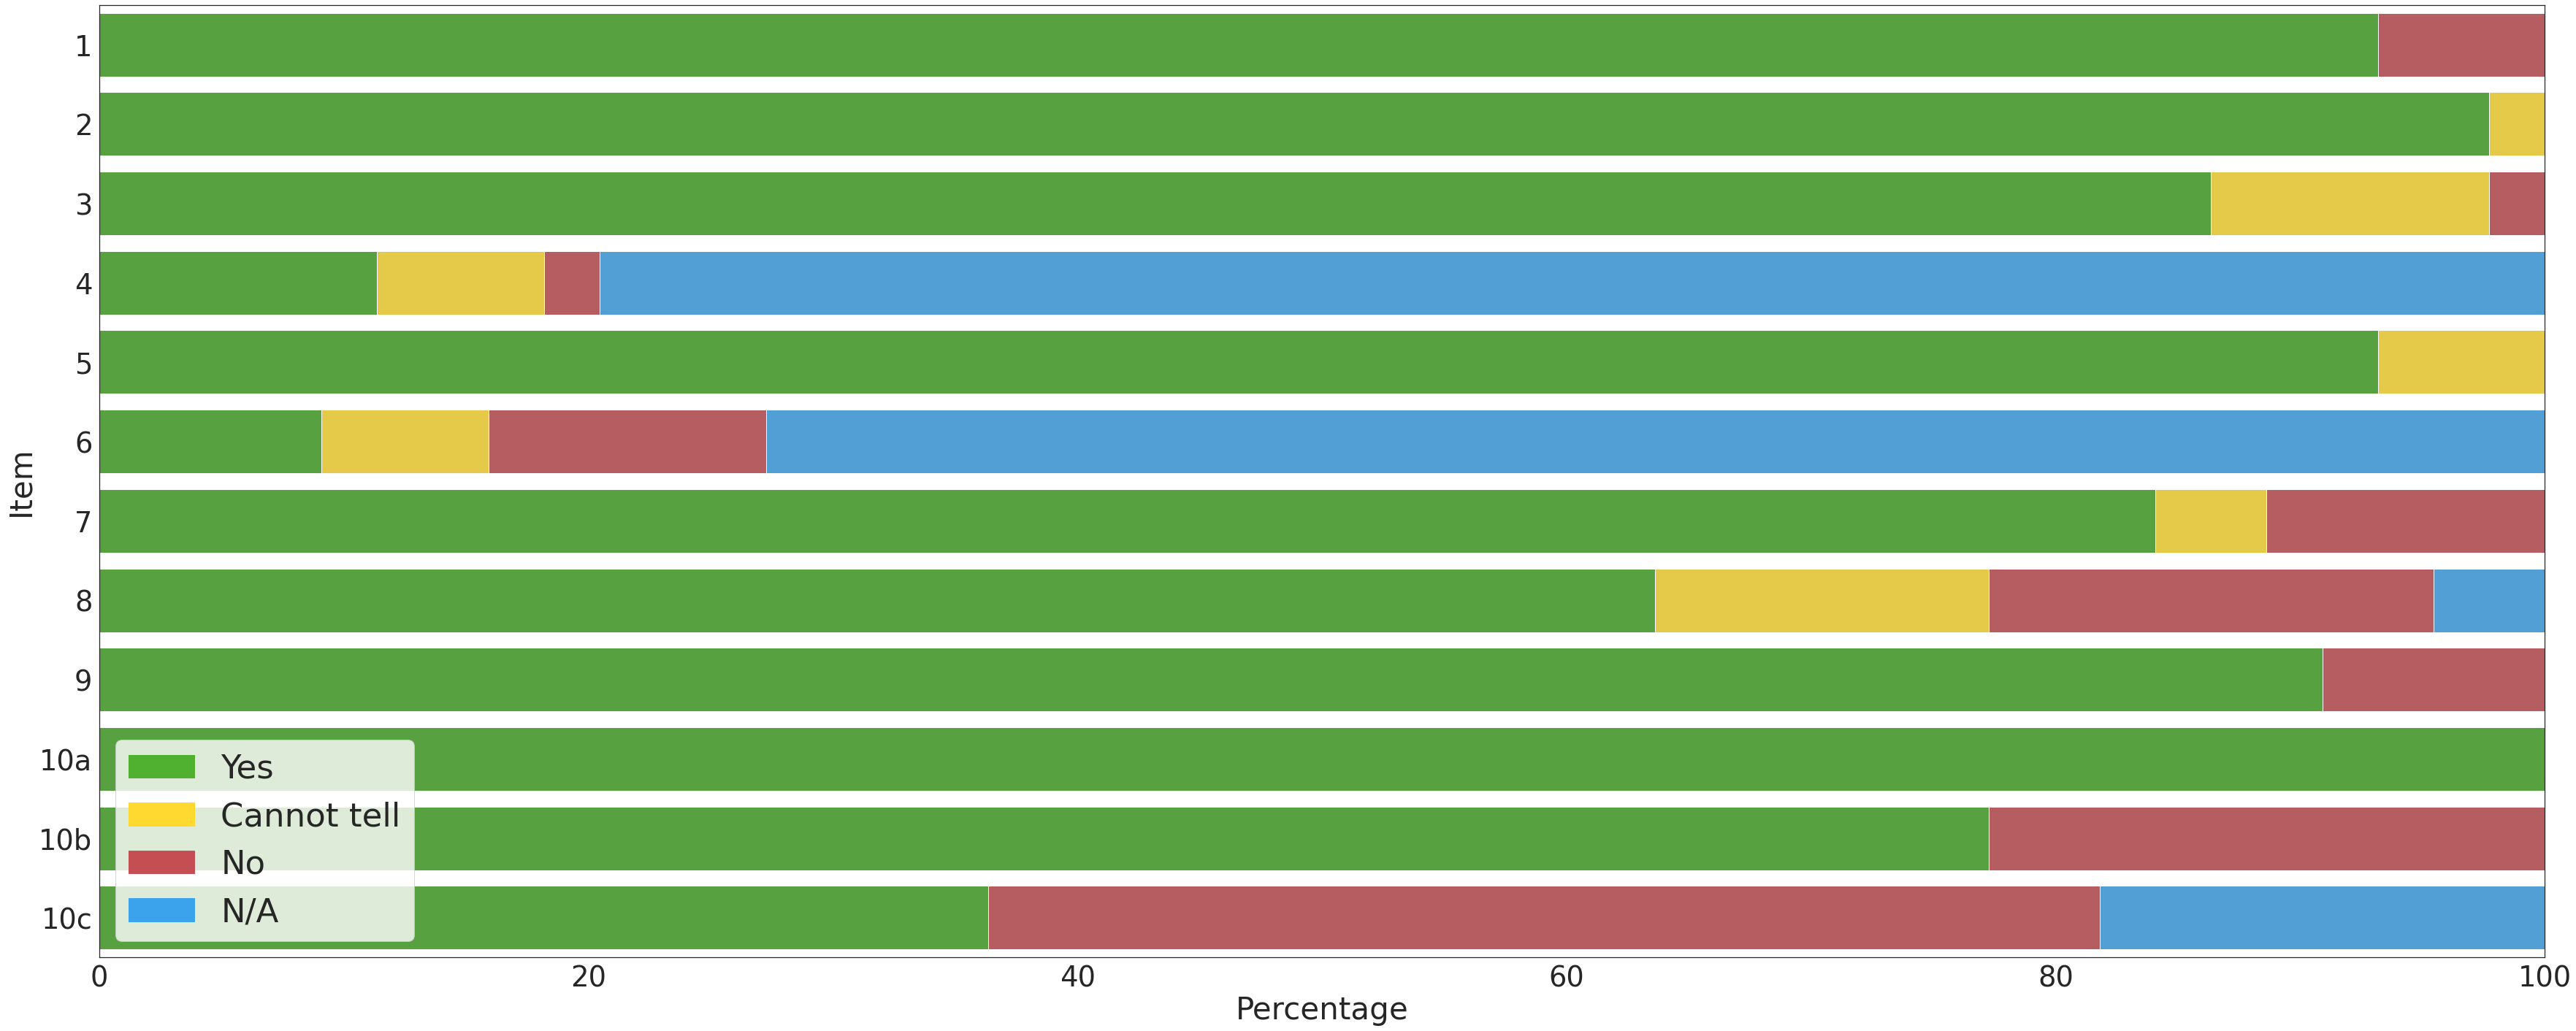

In [79]:
plt.figure(figsize=(60, 24))

# sns.color_palette("pastel")

sns.set(font_scale=3.5, style='white')

bar4 = sns.barplot(y="Answers", x="NA_changed", data=df_casp, color=sns.color_palette("husl", 9)[6])
bar2 = sns.barplot(y="Answers", x="No_changed", data=df_casp, color=sns.color_palette()[3])
bar3 = sns.barplot(y="Answers", x="Cannot tell_changed", data=df_casp, color=sns.color_palette("Set2", 9)[5])
ax = bar1 = sns.barplot(y="Answers", x="Yes_changed", data=df_casp, color=sns.color_palette("husl", 9)[3])

sns.color_palette("Set2", 9)[5] # żółty
sns.color_palette()[3] #red
sns.color_palette("husl", 9)[3] #zielony
sns.color_palette("husl", 9)[6] #niebieski

leg_bar1 = mpatches.Patch(color=sns.color_palette("husl", 9)[3], label='Yes')
leg_bar2 = mpatches.Patch(color=sns.color_palette()[3], label='No')
leg_bar3 = mpatches.Patch(color=sns.color_palette("Set2", 9)[5], label='Cannot tell')
leg_bar4 = mpatches.Patch(color=sns.color_palette("husl", 9)[6], label='N/A')

plt.legend(handles=[leg_bar1, leg_bar3, leg_bar2, leg_bar4], loc='lower left', prop={'size': 45})
# plt.legend()
ax.set(xlabel='Percentage', ylabel='Item',)
ax.set(xlim=(0,100))

### single studies

In [ ]:
df_casp_studies = pd.read_csv(path_casp_single, na_filter=False)
df_casp_studies.head()

ID  Yes  No  Can't tell  NA
0    Albano 2021    9   1           0   2
1  Andalibi 2017   11   0           0   1
2    Barney 2011   11   1           0   0
3      Beck 2016    9   1           0   2
4      Bronstein    7   3           0   2

In [ ]:
df_casp_studies["NA_changed"] = 100
df_casp_studies["No_changed"] = (df_casp_studies["No"] + df_casp_studies["Can't tell"] + df_casp_studies["Yes"]) * 100/12
df_casp_studies["Can't tell_changed"] = (df_casp_studies["Can't tell"] + df_casp_studies["Yes"]) * 100/12
df_casp_studies["Yes_changed"] = df_casp_studies["Yes"] * 100/12

In [ ]:
df_casp_studies

ID  Yes  No  Can't tell  NA  NA_changed  \
0                      Albano 2021    9   1           0   2         100   
1                    Andalibi 2017   11   0           0   1         100   
2                      Barney 2011   11   1           0   0         100   
3                        Beck 2016    9   1           0   2         100   
4                        Bronstein    7   3           0   2         100   
5                       Brown 2014   10   0           0   2         100   
6                         Chen2020    6   4           2   0         100   
7                  Cunningham 2007    9   2           0   1         100   
8                       Doran 2011    7   2           1   2         100   
9                      Edward 2012    9   1           0   2         100   
10                     Eghdam 2018   10   1           0   1         100   
11                Elran-Barak 2021    8   2           0   2         100   
12                      Evans 2012    9   1           0   2         100   
13                 Flickinger 2022    9   3           0   0         100   
14                    Gajaria 2011    9   1           0   2         100   
15                      Gavin 2008    8   2           0   2         100   
16                      Giles 2011    5   4           1   2         100   
17                        Goh 2022    9   1           0   2         100   
18                    Greiner 2017    8   0           2   2         100   
19                     Horgan 2013    9   1           2   0         100   
20                  Juarascio 2010    9   1           0   2         100   
21          Kantrowitz-Gordon 2013    9   0           1   2         100   
22                     Kendal 2016   10   1           0   1         100   
23             Keski-Rahkonen 2005    9   1           0   2         100   
24                        Kim 2022    8   2           0   2         100   
25                      Lavis 2020    6   4           0   2         100   
26                     Lerman 2016    9   1           0   2         100   
27                        Liu 2017    7   2           3   0         100   
28                       Lord 2016   10   0           0   2         100   
29  Moore 2016 A Thematic Analysis   10   0           0   2         100   
30                      Mudry 2012    7   2           3   0         100   
31                    Naslund 2014    9   1           0   2         100   
32                       Park 2017    9   1           0   2         100   
33                   Prescott 2020    7   2           1   2         100   
34           Salzmann-Erikson 2016    8   0           2   2         100   
35                    Sharkey 2012   11   1           0   0         100   
36                        Sik 2021    6   2           2   2         100   
37                   Smithson 2011    7   4           1   0         100   
38                    Soussan 2014    7   2           1   2         100   
39                     Sowles 2018    9   1           0   2         100   
40                     Struik 2014    9   1           0   2         100   
41                   Walstrom 2000    7   2           2   1         100   
42                     Worley 2019    7   2           1   2         100   
43                        Yip 2019    9   1           0   2         100   

    No_changed  Can't tell_changed  Yes_changed  
0    83.333333           75.000000    75.000000  
1    91.666667           91.666667    91.666667  
2   100.000000           91.666667    91.666667  
3    83.333333           75.000000    75.000000  
4    83.333333           58.333333    58.333333  
5    83.333333           83.333333    83.333333  
6   100.000000           66.666667    50.000000  
7    91.666667           75.000000    75.000000  
8    83.333333           66.666667    58.333333  
9    83.333333           75.000000    75.000000  
10   91.666667           83.333333    83.333333  
11   83.333333           66.666667    66.666667  
12   8

In [ ]:
sns.set(font_scale=1.2, style='white')

[(0.0, 100.0)]

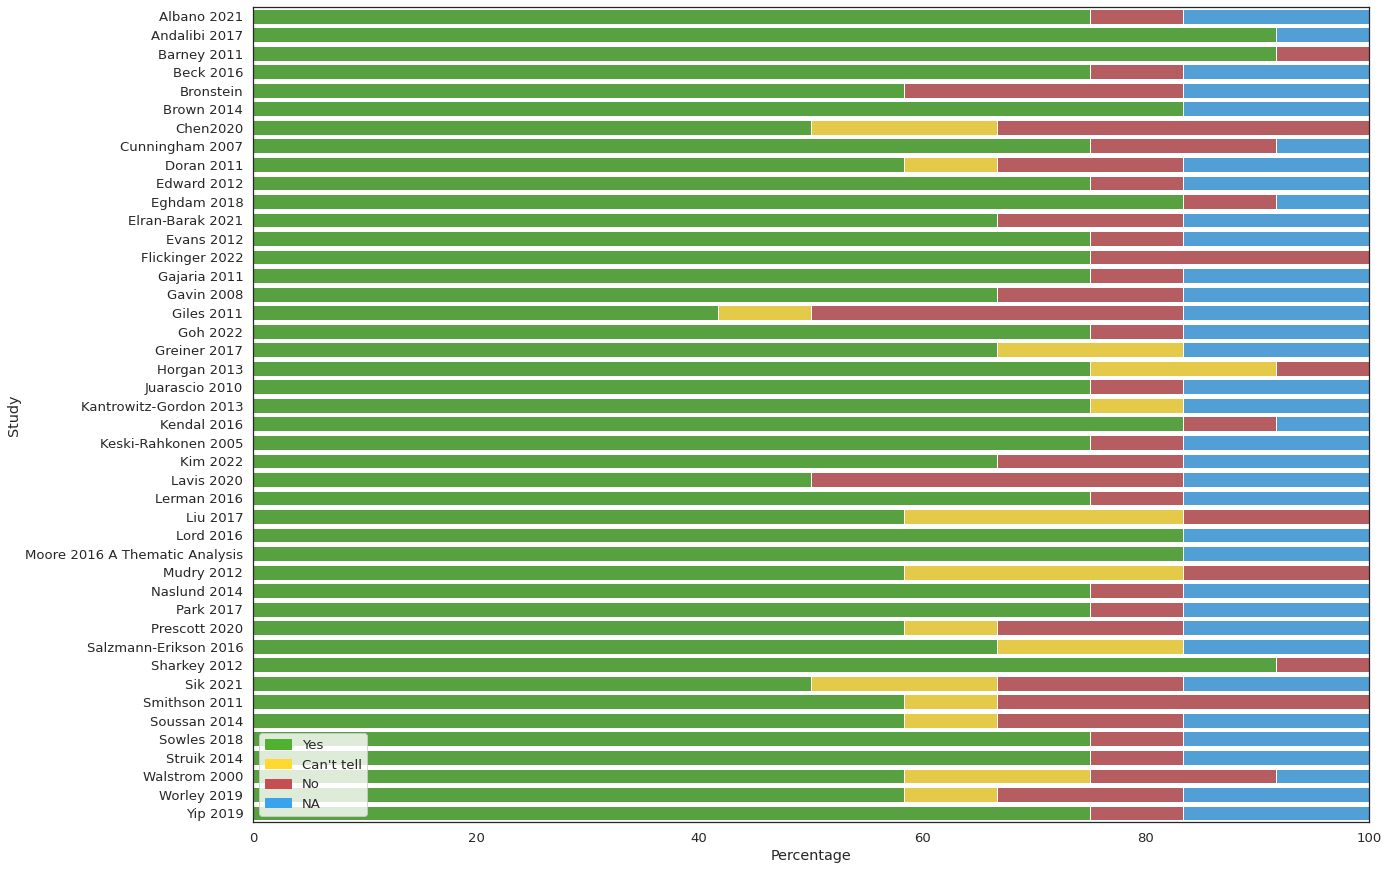

In [ ]:
plt.figure(figsize=(20, 15))

# sns.color_palette("pastel")

bar4 = sns.barplot(y="ID", x="NA_changed", data=df_casp_studies, color=sns.color_palette("husl", 9)[6])
bar2 = sns.barplot(y="ID", x="No_changed", data=df_casp_studies, color=sns.color_palette()[3])
bar3 = sns.barplot(y="ID", x="Can't tell_changed", data=df_casp_studies, color=sns.color_palette("Set2", 9)[5])
ax = bar1 = sns.barplot(y="ID", x="Yes_changed", data=df_casp_studies, color=sns.color_palette("husl", 9)[3])

leg_bar1 = mpatches.Patch(color=sns.color_palette("husl", 9)[3], label='Yes')
leg_bar2 = mpatches.Patch(color=sns.color_palette()[3], label='No')
leg_bar3 = mpatches.Patch(color=sns.color_palette("Set2", 9)[5], label='Can\'t tell')
leg_bar4 = mpatches.Patch(color=sns.color_palette("husl", 9)[6], label='NA')

plt.legend(handles=[leg_bar1, leg_bar3, leg_bar2, leg_bar4], loc='lower left')
ax.set(xlabel='Percentage', ylabel='Study')
ax.set(xlim=(0,100))

## clustermap

In [ ]:
iris = sns.load_dataset("iris")
iris.pop("species")
iris

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

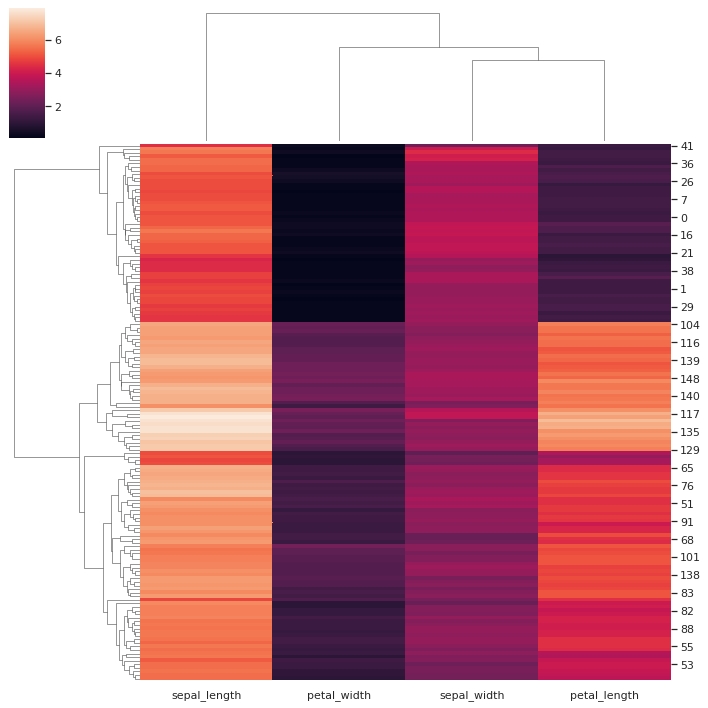

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)

iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris)

In [ ]:
df_cluster = pd.read_csv('heatmap-data.csv', sep=";")
df_cluster = df_cluster.drop(["ID", "illness-original", "illness-changed", "Illness-new-older", "illness-num"], axis=1)
df_cluster["Illness-new"] = df_cluster["Illness-new"].astype('category')
df_cluster.head()

instrumental  tangible  informational  ...  disagreement  rejection  Illness-new
0             1         0              1  ...             0          0   depression
1             0         1              1  ...             1          0   depression
2             0         0              0  ...             0          0   depression
3             0         0              0  ...             0          0          OCD
4             0         0              1  ...             0          1   addictions

[5 rows x 43 columns]

### correlation

In [ ]:
lut = {'depression':'0', 'OCD':'1', 'BD':'2', 'addictions':'3', 'ED':'4', 'other':'5', 'MCI':'6', 'PPD':'7', 'ADHD':'8', 'schizophrenia':'9', 'schizoaffective':'10', 'anxiety disorders':'11', 'PTSD':'12'}

In [ ]:
df_cluster["Illness-new"] = df_cluster["Illness-new"].map(lut)

In [ ]:
df_cluster.corr().to_csv()

',instrumental,tangible,informational,practical tricks,warnings,related to medication,related to professional help,related to side effects,acceptance,positive,negative,network,encouraging disclosure,requesting engagement,appreciation / gratitude,small talks / socializing,verification the authenticity,relationship,confidentiality,encouragement / motivation,spiritual,situation appraisal,presence / companion,request for other kinds of support,clarifications,apologizing,referring to the rules,agression,reluctance / aversion,tension release / jokes,illegal advices,request for information,empathy / compassion,offering hope,request for opinions / suggestions,compliment,sharing self disclosure,behaviors promotion,referral,sarcastic comments,disagreement,rejection\ninstrumental,1.0,0.019956144669641677,0.0060170040119319574,0.059868434008924935,-0.1534264276484303,0.20447131584993627,-0.14230081178013276,0.07387198368257747,0.1583969877704969,0.32461722703211776,0.03919309008348103,0.0905982365

In [ ]:
x = df_cluster.values

In [ ]:
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

TypeError: ignored

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
df_cluster = pd.read_csv('heatmap-data.csv', sep=";")
df_cluster = df_cluster.drop(["ID", "illness-original", "illness-changed", "Illness-new-older", "illness-num"], axis=1)
df_cluster["Illness-new"] = df_cluster["Illness-new"].astype('category')
data_encoded = df_cluster
data_encoded.head()

instrumental  tangible  informational  ...  disagreement  rejection  Illness-new
0             1         0              1  ...             0          0   depression
1             0         1              1  ...             1          0   depression
2             0         0              0  ...             0          0   depression
3             0         0              0  ...             0          0          OCD
4             0         0              1  ...             0          1   addictions

[5 rows x 43 columns]

In [ ]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    
    cramers = cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V 
    print("v1:", var1, "v2", var2, cramers) 
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df

v1: instrumental v2 instrumental 0.9263540683153608
v1: instrumental v2 tangible 0.0
v1: instrumental v2 informational 0.0
v1: instrumental v2 practical tricks 0.0
v1: instrumental v2 warnings 0.0
v1: instrumental v2 related to medication 0.0
v1: instrumental v2 related to professional help 0.0
v1: instrumental v2 related to side effects 0.0
v1: instrumental v2 acceptance 0.0
v1: instrumental v2 positive 0.2110867846070168
v1: instrumental v2 negative 0.0
v1: instrumental v2 network 0.0
v1: instrumental v2 encouraging disclosure 0.0
v1: instrumental v2 requesting engagement 0.0
v1: instrumental v2 appreciation / gratitude 0.010556955943079897
v1: instrumental v2 small talks / socializing 0.3758832269995012
v1: instrumental v2 verification the authenticity 0.0
v1: instrumental v2 relationship 0.0
v1: instrumental v2 confidentiality 0.0
v1: instrumental v2 encouragement / motivation 0.0
v1: instrumental v2 spiritual 0.0
v1: instrumental v2 situation appraisal 0.0
v1: instrumental v2 pres

KeyboardInterrupt: ignored

### tree

In [ ]:
df_illness =  pd.read_csv('heatmap-data.csv', sep=";")
df_illness = df_illness["illness-new"]
df_illness.unique()

array(['depression and BD', 'OCD', 'addictions', 'ED', 'other',
       'dementia and MCI', 'PPD', 'ADHD', 'schizophrenia',
       'schizoaffective', 'anxiety disorders', 'PTSD'], dtype=object)

In [ ]:
lut = {'depression and BD':'red', 'OCD':'green', 'addictions':'yellow', 'ED':'blue', 'other':'darkgreen', 'dementia and MCI':'pink', 'PPD':'brown', 'ADHD':'orange', 'schizophrenia':'purple',
       'schizoaffective':'lightblue', 'anxiety disorders':'lightgreen', 'PTSD':'darkblue'}

In [ ]:
colors = df_illness.map(lut)
colors

0            red
1            red
2            red
3          green
4         yellow
5         yellow
6           blue
7      darkgreen
8           pink
9          brown
10        orange
11          blue
12     darkgreen
13        yellow
14           red
15          blue
16         brown
17          blue
18          blue
19           red
20        yellow
21          blue
22         brown
23        yellow
24           red
25        purple
26     lightblue
27           red
28    lightgreen
29      darkblue
30      darkblue
31     darkgreen
32     darkgreen
33     darkgreen
34          blue
35        yellow
36          blue
37          blue
38           red
39    lightgreen
Name: illness-new, dtype: object

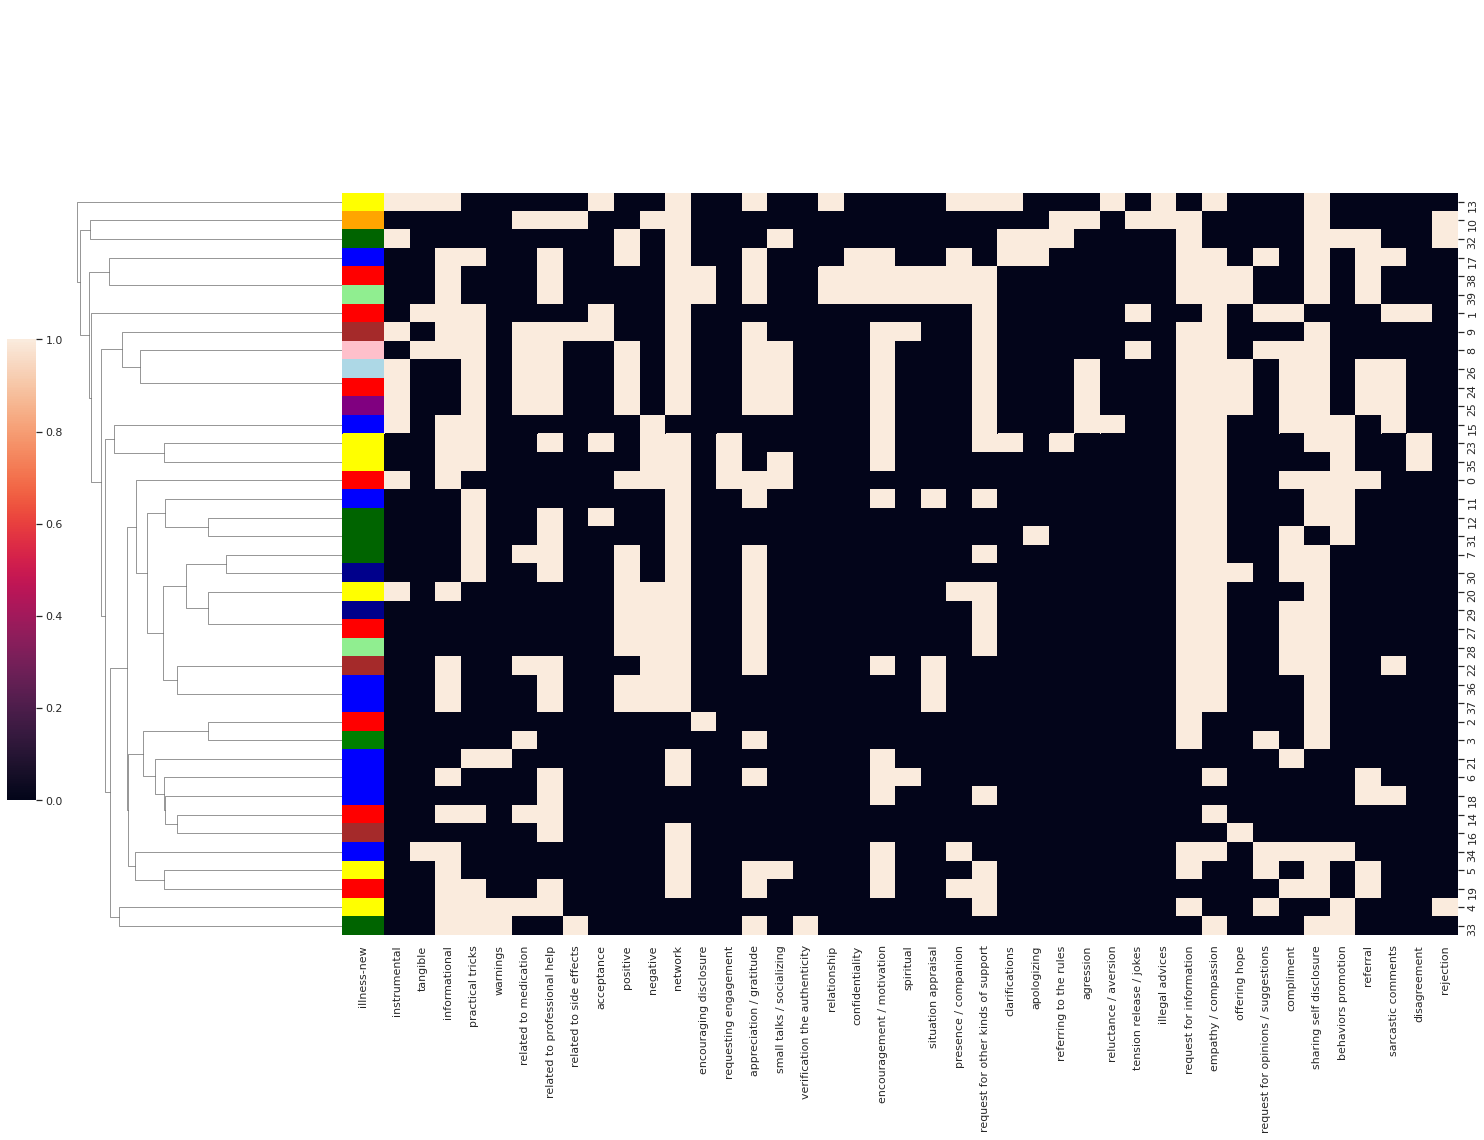

In [ ]:
# plt.figure(figsize=(40, 80))
sns.clustermap(df_cluster, col_cluster=False, figsize=(20,16), cbar_pos=(-0.03, .3, .02, .4), row_colors=colors)

In [ ]:
pal = sns.husl_palette(12, s=.45)
lut = dict(zip(df_illness.unique(), network_pal))


df_illness =  pd.read_csv('heatmap-data.csv', sep=";")
df_illness.index = 
df_illness = df_illness["illness-new"]
colors = df_illness.map(lut)
colors

0     (0.8167028311697733, 0.5345122109266688, 0.575...
1     (0.8167028311697733, 0.5345122109266688, 0.575...
2     (0.8167028311697733, 0.5345122109266688, 0.575...
3     (0.7847342610478556, 0.5614603111530924, 0.452...
4     (0.6813276573373218, 0.6029711581968916, 0.450...
5     (0.6813276573373218, 0.6029711581968916, 0.450...
6     (0.601243246823196, 0.6281411529879642, 0.4495...
7     (0.47974942417114835, 0.6571819677589695, 0.44...
8     (0.4597739872117063, 0.6525158000727045, 0.565...
9     (0.46712078684915886, 0.6454760674453914, 0.62...
10    (0.4742233215929232, 0.6384389499945919, 0.681...
11    (0.601243246823196, 0.6281411529879642, 0.4495...
12    (0.47974942417114835, 0.6571819677589695, 0.44...
13    (0.6813276573373218, 0.6029711581968916, 0.450...
14    (0.8167028311697733, 0.5345122109266688, 0.575...
15    (0.601243246823196, 0.6281411529879642, 0.4495...
16    (0.46712078684915886, 0.6454760674453914, 0.62...
17    (0.601243246823196, 0.6281411529879642, 0.

In [ ]:
df_illness =  pd.read_csv('heatmap-data.csv', sep=";")
df_illness.transpose()

0   ...                 39
ID                                      Andalibi 2017  ...           Yip 2019
instrumental                                        1  ...                  0
tangible                                            0  ...                  0
informational                                       1  ...                  1
practical tricks                                    0  ...                  0
warnings                                            0  ...                  0
related to medication                               0  ...                  0
related to professional help                        0  ...                  1
related to side effects                             0  ...                  0
acceptance                                          0  ...                  0
positive                                            1  ...                  0
negative                                            1  ...                  0
network                                             1  ...                  1
encouraging disclosure                              0  ...                  1
requesting engagement                               1  ...                  0
appreciation / gratitude                            1  ...                  1
small talks / socializing                           1  ...                  0
verification the authenticity                       0  ...                  0
relationship                                        0  ...                  1
confidentiality                                     0  ...                  1
encouragement / motivation                          0  ...                  1
spiritual                                           0  ...                  1
situation appraisal                                 0  ...                  1
presence / companion                                0  ...                  1
request for other kinds of support                  0  ...                  1
clarifications                                      0  ...                  0
apologizing                                         0  ...                  0
referring to the rules                              0  ...                  0
agression                                           0  ...                  0
reluctance / aversion                               0  ...                  0
tension release / jokes                             0  ...                  0
illegal advices                                     0  ...                  0
request for information                             1  ...                  1
empathy / compassion                                1  ...                  1
offering hope                                       0  ...                  1
request for opinions / suggestions                  0  ...                  0
compliment                                          1  ...                  0
sharing self disclosure                             1  ...                  1
behaviors promotion                                 1  ...                  0
referral                                            1  ...                  1
sarcastic comments                                  0  ...                  0
disagreement                                        0  ...                  0
rejection                                           0  ...                  0
illness-num                                         1  ...                  2
illness-original                           depression  ...            anxiety
illness-changed                            depression  ...  anxiety disorders
illness-new                         depression and BD  ...  anxiety disorders

[47 rows x 40 columns]

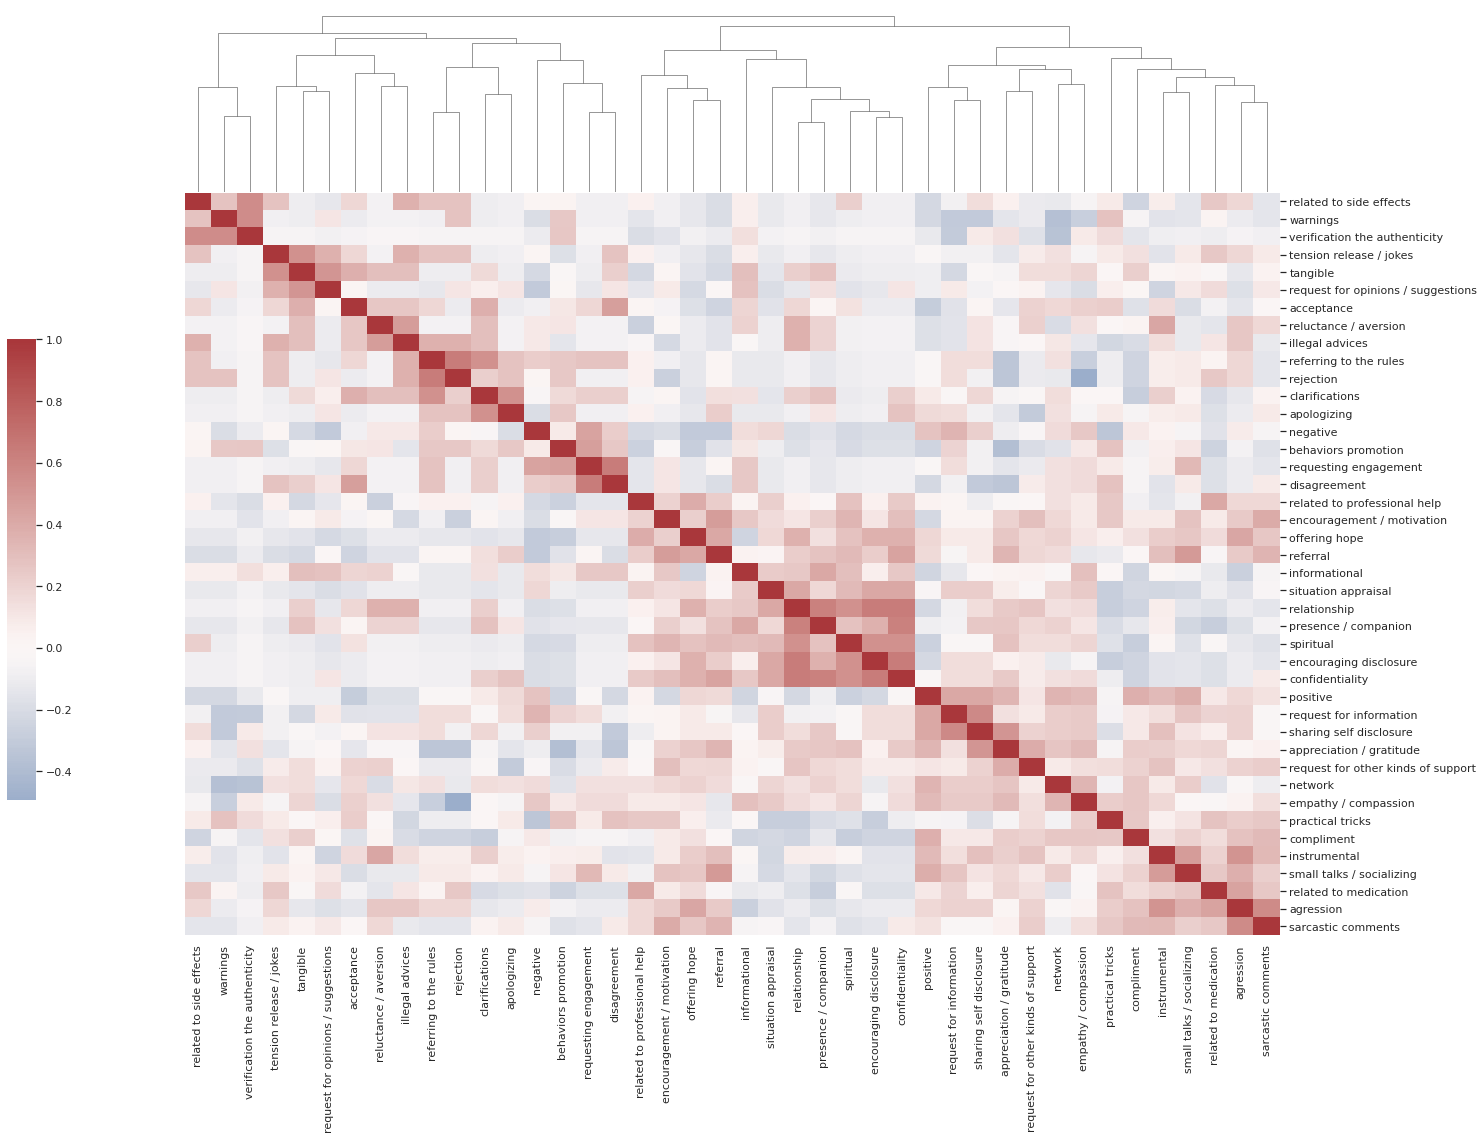

In [ ]:
g = sns.clustermap(df_cluster.corr(), center=0, figsize=(20,16), cbar_pos=(-0.03, .3, .02, .4), cmap="vlag", dendrogram_ratio=(.1, .2))
g.ax_row_dendrogram.remove()

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

network_colors

# # Draw the full plot
# g = sns.clustermap(df.corr(), center=0, cmap="vlag",
#                    row_colors=network_colors, col_colors=network_colors,
#                    dendrogram_ratio=(.1, .2),
#                    cbar_pos=(.02, .32, .03, .2),
#                    linewidths=.75, figsize=(12, 13))

# g.ax_row_dendrogram.remove()

network  node  hemi
1        1     lh      (0.8167028311697733, 0.5345122109266688, 0.575...
               rh      (0.8167028311697733, 0.5345122109266688, 0.575...
5        1     lh      (0.7256380093027939, 0.5865684184445076, 0.451...
               rh      (0.7256380093027939, 0.5865684184445076, 0.451...
6        1     lh      (0.601243246823196, 0.6281411529879642, 0.4495...
               rh      (0.601243246823196, 0.6281411529879642, 0.4495...
         2     lh      (0.601243246823196, 0.6281411529879642, 0.4495...
               rh      (0.601243246823196, 0.6281411529879642, 0.4495...
7        1     lh      (0.4542447259142938, 0.6576596537208662, 0.513...
               rh      (0.4542447259142938, 0.6576596537208662, 0.513...
         2     lh      (0.4542447259142938, 0.6576596537208662, 0.513...
               rh      (0.4542447259142938, 0.6576596537208662, 0.513...
         3     lh      (0.4542447259142938, 0.6576596537208662, 0.513...
               rh      (0.45424

In [ ]:
df.head()

network          1                     5  ...         17                       
node             1                     1  ...          3                      4
hemi            lh         rh         lh  ...         lh          rh         lh
0        56.055744  92.031036 -35.898861  ... -10.520872  120.490463 -39.686432
1        55.547253  43.690075  19.568010  ... -39.607521   24.764011 -36.771008
2        60.997768  63.438793  19.247454  ...  12.985169  -75.027451   6.434262
3        18.514868  12.657158  32.896915  ... -15.819172  -37.361431  -4.650954
4        -2.527392 -63.104668  18.396759  ...   5.453649    5.169828  87.809135

[5 rows x 38 columns]

## graph

### examples

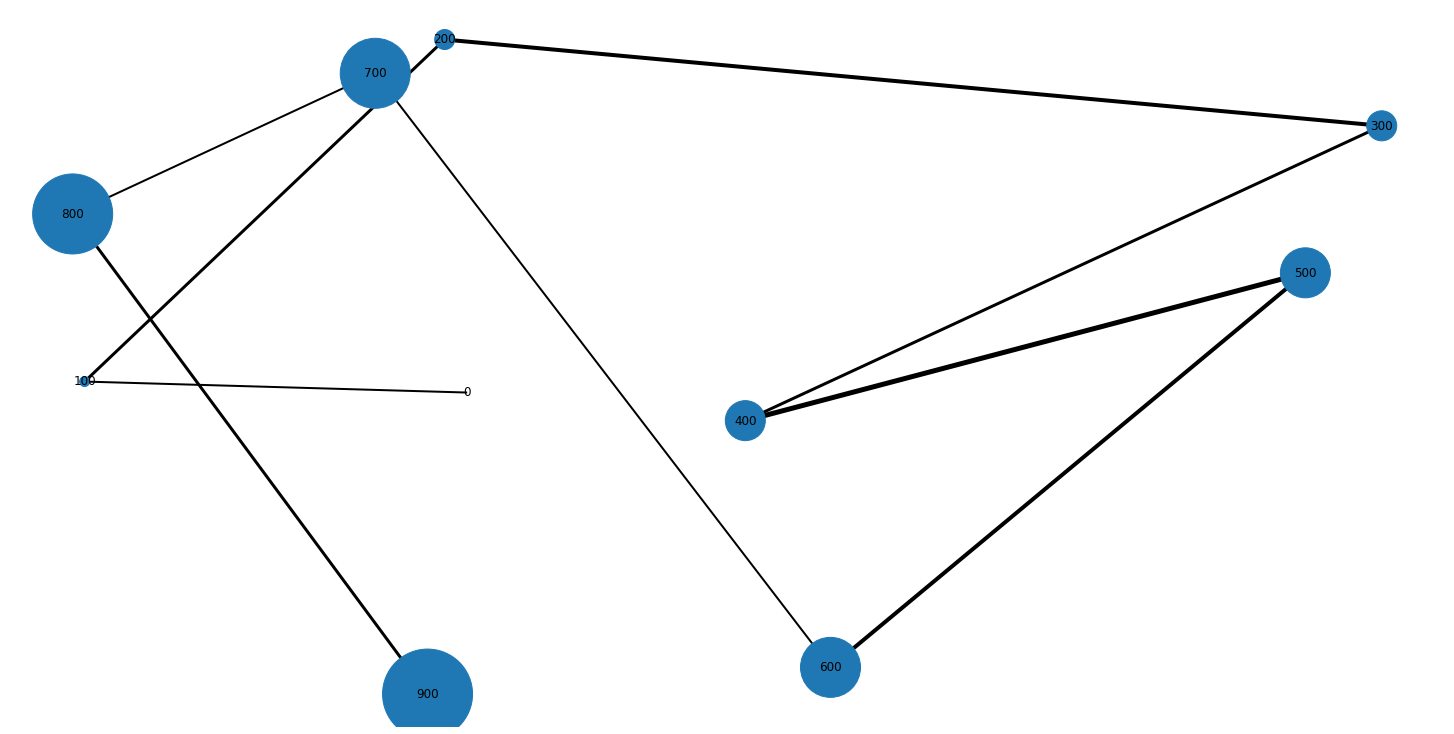

In [ ]:
import sys, networkx as nx, matplotlib.pyplot as plt
import random

# Create a list of 10 nodes numbered [0, 9]
nodes = range(10)
node_sizes = []
labels = {}
for n in nodes:
        node_sizes.append( 100 * n* n )
        labels[n] = 100 * n

# Node sizes: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

# Connect each node to its successor
edges = [ (i, i+1) for i in range(len(nodes)-1) ]

# Create the graph and draw it with the node labels
g = nx.Graph()
g.add_nodes_from(nodes)

for e1, e2 in edges:
  g.add_edge(e1, e2, weight=random.randint(1,5))

weights = [g[u][v]['weight'] for u,v in edges]

plt.figure(figsize=(20,10))
nx.draw_random(g, node_size = node_sizes, labels=labels, with_labels=True, width=weights)    
plt.show()


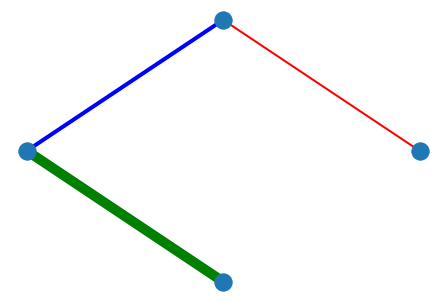

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edge(1,2,color='r',weight=2)
G.add_edge(2,3,color='b',weight=4)
G.add_edge(3,4,color='g',weight=10)

pos = nx.circular_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edge_color=colors, width=weights)

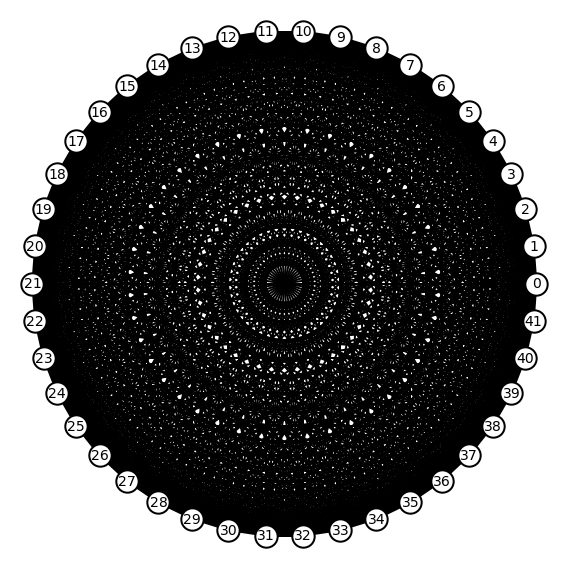

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# A rainbow color mapping using matplotlib's tableau colors
node_dist_to_color = {
    1: "tab:red",
    2: "tab:orange",
    3: "tab:olive",
    4: "tab:green",
    5: "tab:blue",
    6: "tab:purple",
    7: "tab:olive",
    8: "tab:red",
    9: "tab:orange",
    10: "tab:olive",
    11: "tab:green",
    12: "tab:blue",
    13: "tab:purple",
    14: "tab:olive",
    15: "tab:olive",
    16: "tab:red",
    17: "tab:orange",
    18: "tab:olive",
    19: "tab:green",
    20: "tab:blue",
    21: "tab:purple",
    22: "tab:olive",
}

# Create a complete graph with an odd number of nodes
nnodes = 42
G = nx.complete_graph(nnodes)

# A graph with (2n + 1) nodes requires n colors for the edges
n = (nnodes - 1) // 2
ndist_iter = list(range(1, n + 1))

# Take advantage of circular symmetry in determining node distances
ndist_iter += ndist_iter[::-1]


def cycle(nlist, n):
    return nlist[-n:] + nlist[:-n]


# Rotate nodes around the circle and assign colors for each edge based on
# node distance
nodes = list(G.nodes())
# for i, nd in enumerate(ndist_iter):
#     for u, v in zip(nodes, cycle(nodes, i + 1)):
#         G[u][v]["color"] = 'tab:blue'
#         # node_dist_to_color[nd]

pos = nx.circular_layout(G)
# Create a figure with 1:1 aspect ratio to preserve the circle.
fig, ax = plt.subplots(figsize=(8, 8))
node_opts = {"node_size": 500, "node_color": "w", "edgecolors": "k", "linewidths": 2.0}
nx.draw_networkx_nodes(G, pos, **node_opts)
nx.draw_networkx_labels(G, pos, font_size=14)
# Extract color from edge data
# edge_colors = [edgedata["color"] for _, _, edgedata in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=2.0)#, edge_color=edge_colors)

ax.set_axis_off()
fig.tight_layout()
plt.show()

### ours

In [ ]:
df_graph = pd.read_csv(path_codes)
df_graph = df_graph.drop(["ID", 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5', 'illness-num'], axis=1)
df_graph.head()

instrumental  tangible  informational  practical tricks  warnings  \
0             1         0              1                 0         0   
1             0         0              0                 0         0   
2             0         1              1                 1         0   
3             0         0              0                 0         0   
4             0         0              1                 1         1   

   related to medication  related to professional help  \
0                      0                             0   
1                      0                             0   
2                      0                             0   
3                      1                             0   
4                      1                             1   

   related to side effects  acceptance  positive  ...  empathy / compassion  \
0                        0           0         1  ...                     1   
1                        0           0         0  ...                     0   
2                        0           1         0  ...                     1   
3                        0           0         0  ...                     0   
4                        0           0         0  ...                     0   

   offering hope  request for opinions / suggestions  compliment  \
0              0                                   0           1   
1              0                                   0           0   
2              0                                   1           1   
3              0                                   1           0   
4              0                                   1           0   

   sharing self disclosure  behaviors promotion  referral  sarcastic comments  \
0                        1                    1         1                   0   
1                        1                    0         0                   0   
2                        0                    0         0                   1   
3                        1                    0         0                   0   
4                        0                    1         0                   0   

   disagreement  rejection  
0             0          0  
1             0          0  
2             1          0  
3             0          0  
4             0          1  

[5 rows x 42 columns]

In [ ]:
df_graph.describe()

instrumental   tangible  informational  practical tricks   warnings  \
count     58.000000  58.000000      58.000000         58.000000  58.000000   
mean       0.224138   0.068966       0.551724          0.465517   0.051724   
std        0.420655   0.255609       0.501661          0.503166   0.223404   
min        0.000000   0.000000       0.000000          0.000000   0.000000   
25%        0.000000   0.000000       0.000000          0.000000   0.000000   
50%        0.000000   0.000000       1.000000          0.000000   0.000000   
75%        0.000000   0.000000       1.000000          1.000000   0.000000   
max        1.000000   1.000000       1.000000          1.000000   1.000000   

       related to medication  related to professional help  \
count              58.000000                     58.000000   
mean                0.379310                      0.568966   
std                 0.489453                      0.499546   
min                 0.000000                      0.000000   
25%                 0.000000                      0.000000   
50%                 0.000000                      1.000000   
75%                 1.000000                      1.000000   
max                 1.000000                      1.000000   

       related to side effects  acceptance   positive  ...  \
count                58.000000   58.000000  58.000000  ...   
mean                  0.068966    0.103448   0.327586  ...   
std                   0.255609    0.307203   0.473432  ...   
min                   0.000000    0.000000   0.000000  ...   
25%                   0.000000    0.000000   0.000000  ...   
50%                   0.000000    0.000000   0.000000  ...   
75%                   0.000000    0.000000   1.000000  ...   
max                   1.000000    1.000000   1.000000  ...   

       empathy / compassion  offering hope  \
count             58.000000      58.000000   
mean               0.706897       0.120690   
std                0.459161       0.328611   
min                0.000000       0.000000   
25%                0.000000       0.000000   
50%                1.000000       0.000000   
75%                1.000000       0.000000   
max                1.000000       1.000000   

       request for opinions / suggestions  compliment  \
count                           58.000000   58.000000   
mean                             0.275862    0.327586   
std                              0.450851    0.473432   
min                              0.000000    0.000000   
25%                              0.000000    0.000000   
50%                              0.000000    0.000000   
75%                              1.000000    1.000000   
max                              1.000000    1.000000   

       sharing self disclosure  behaviors promotion   referral  \
count                58.000000            58.000000  58.000000   
mean                  0.672414             0.206897   0.362069   
std                   0.473432             0.408619   0.484796   
min                   0.000000             0.000000   0.000000   
25%                   0.000000             0.000000   0.000000   
50%                   1.000000             0.000000   0.000000   
75%                   1.000000             0.000000   1.000000   
max                   1.000000             1.000000   1.000000   

       sarcastic comments  disagreement  rejection  
count           58.000000     58.000000  58.000000  
mean             0.137931      0.051724   0.051724  
std              0.347839      0.223404   0.223404  
min              0.000000      0.000000   0.000000  
25%              0.000000      0.000000   0.000000  
50%              0.000000      0.000000   0.000000  
75%              0.000000      0.000000   0.000000  
max              1.000000      1.000000   1.000000  

[8 rows x 42 columns]

In [ ]:
no_disorders_analysed = 58

In [ ]:
df_graph.describe().transpose()['mean'] * no_disorders_analysed

instrumental                          13.0
tangible                               4.0
informational                         32.0
practical tricks                      27.0
warnings                               3.0
related to medication                 22.0
related to professional help          33.0
related to side effects                4.0
acceptance                             6.0
positive                              19.0
negative                              16.0
network                               42.0
encouraging disclosure                14.0
requesting engagement                  3.0
appreciation / gratitude              33.0
small talks / socializing              9.0
verification the authenticity          1.0
relationship                           3.0
confidentiality                        3.0
encouragement / motivation            25.0
spiritual                              5.0
situation appraisal                   13.0
presence / companion                   8.0
request for

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

cols = df_graph.columns

numbers = list(pd.factorize(df_graph.columns)[0] + 1)

cols = dict(zip(numbers, cols))

In [ ]:
len(df_graph[(df_graph[cols[1]] == 1) & (df_graph[cols[5]] == 1)].index)

0

In [ ]:
df_codes = pd.read_csv(path_graph_color)
cols = list(df_codes.code.values)
shorts = list(df_codes.short.values)

cols = dict(zip(shorts, cols))

In [ ]:
cols

{'A1': 'referral',
 'A2': 'request for opinions / suggestions',
 'A3': 'situation appraisal',
 'B1': 'positive',
 'B2': 'negative',
 'C1': 'sharing self disclosure',
 'D1': 'sarcastic comments',
 'D2': 'agression',
 'D3': 'disagreement',
 'D4': 'rejection',
 'D5': 'reluctance / aversion',
 'E1': 'encouragement / motivation',
 'E2': 'compliment',
 'F1': 'practical tricks',
 'F2': 'instrumental',
 'F3': 'tangible',
 'G1': 'appreciation / gratitude',
 'H1': 'requesting engagement',
 'H2': 'request for other kinds of support',
 'H3': 'small talks / socializing',
 'H4': 'encouraging disclosure',
 'I1': 'informational',
 'I2': 'referring to the rules',
 'I3': 'illegal advices',
 'I4': 'warnings',
 'J1': 'request for information',
 'J2': 'clarifications',
 'J3': 'verification the authenticity',
 'K1': 'related to professional help',
 'K2': 'related to medication',
 'K3': 'related to side effects',
 'L1': 'presence / companion',
 'L2': 'offering hope',
 'L3': 'spiritual',
 'L4': 'tension relea

In [ ]:
df_colors = pd.read_csv(path_graph_color)
colors = list(df_colors.color.values)
shorts = list(df_colors.short.values)

colors = dict(zip(shorts, colors))
colors['F1']

'lawngreen'

In [ ]:
len(df_graph[(df_graph[cols['B1']] == 1) & (df_graph[cols['M1']] == 1)].index)

14

10 A1 A2
15 A1 C1
17 A1 J1
19 A1 O1
21 C1 F1
29 C1 G1
34 C1 J1
35 J1 O1


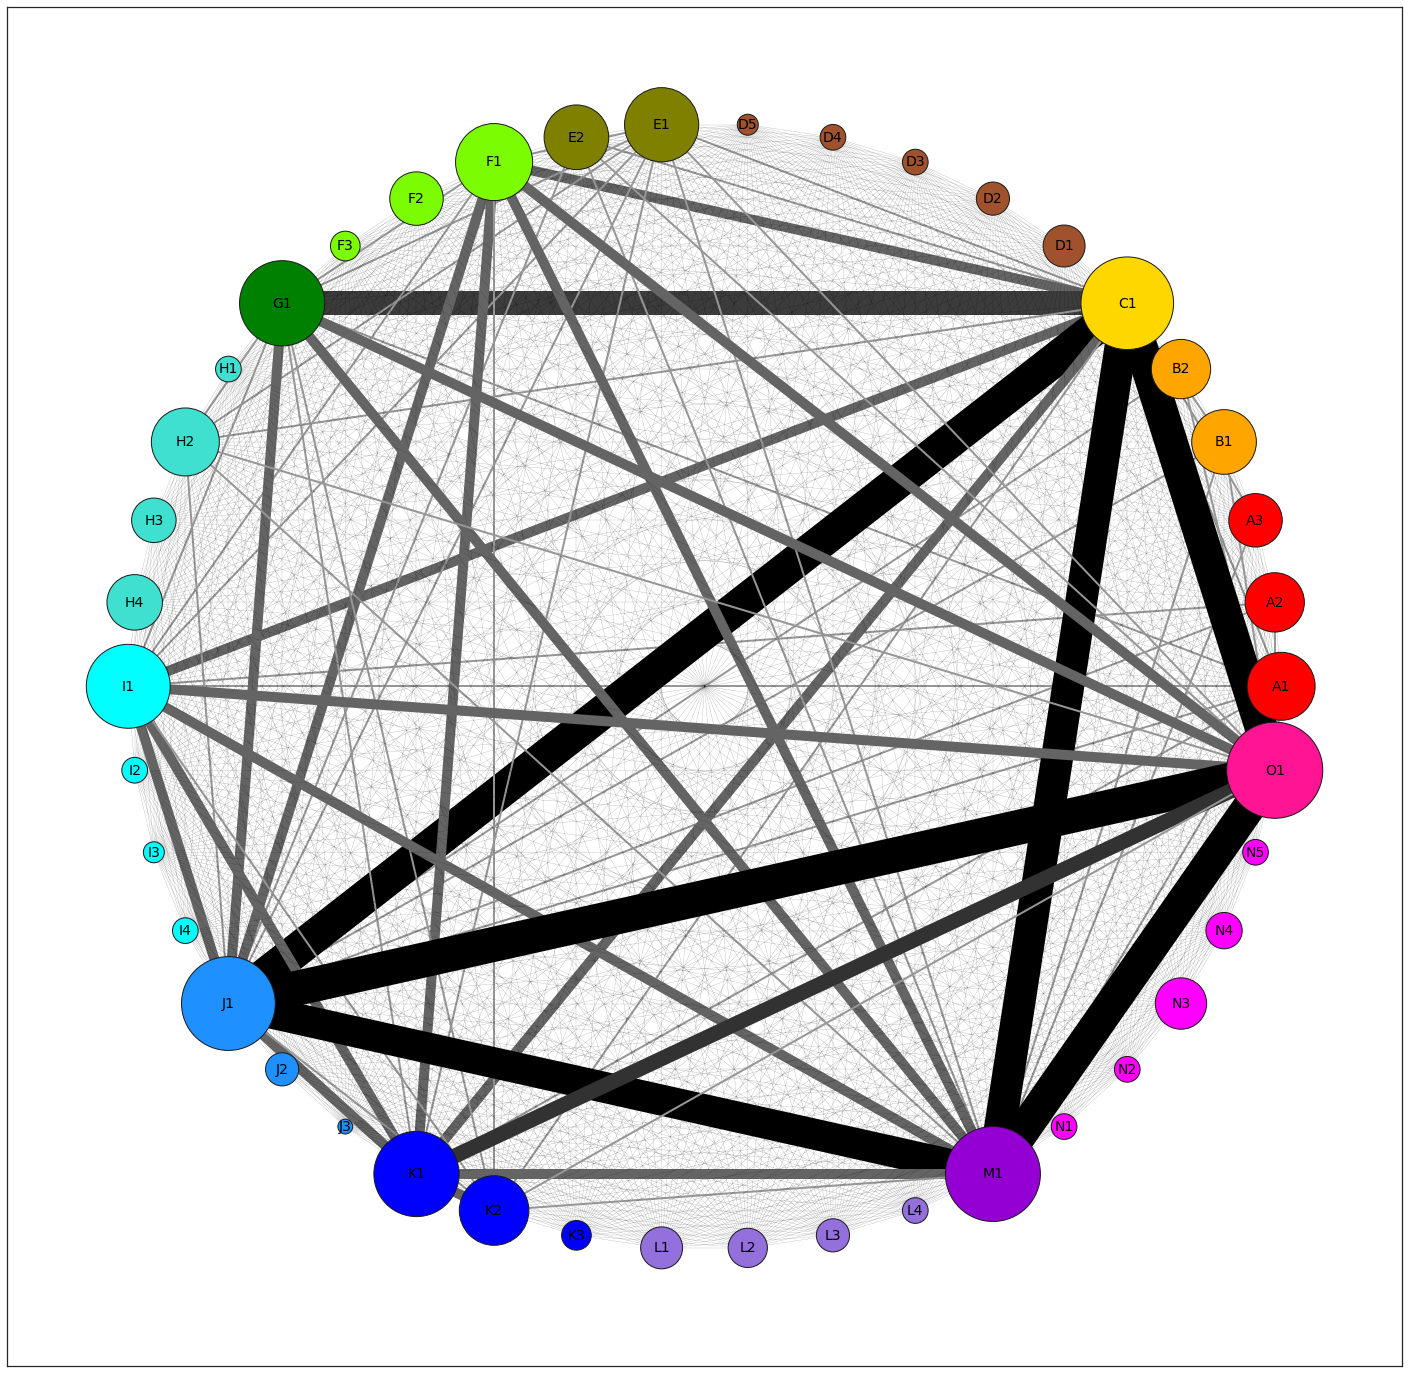

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

nnodes = len(df_graph.columns)

G = nx.Graph()
node_sizes = []
node_colors = []
edge_sizes = []
edge_colors = []
ws = []

sum = 0

first = []
second = []
weigh = []
colo = []

max_w = 0

for x in shorts:
  node_sizes.append(df_graph[cols[x]].sum()*220)
  node_colors.append(colors[x])

  for y in shorts:
    if x == y or ord(x[0]) > ord(y[0]) or (ord(x[0]) == ord(y[0]) and int(x[1]) > int(y[1])):
      continue

    w = len(df_graph[(df_graph[cols[x]] == 1) & (df_graph[cols[y]] == 1)].index)

    if w > max_w:
      max_w = w
      print(max_w,x,y)

    ws.append(w)

    ww = 0.1
    color = 'black'

    if w > 12:
      ww = 2
      color = '#969696'
    if w > 19:
      ww = 10
      color = '#646464'
    if w > 27:
      ww = 15
      color = '#323232'
    if w == 29:
      ww = 24
      color = '#3c3c3c'
    if w > 29:
      ww = w
      color = '#000000'
      # print(x, y, w)
      # continue

    first.append(x)
    second.append(y)
    weigh.append(ww)
    colo.append(color)

    G.add_edge(x, y, weight=ww)
    edge_sizes.append(ww)
    edge_colors.append(color)

# df = pd.DataFrame(list(zip(first, second, weigh, colo)), columns =['first', 'last', 'weight', 'colors'])
# df = df.sort_values('weight')

# for inx, row in df.iterrows():
#   G.add_edge(row['first'], row['last'], weight=row['weight'])
#   edge_sizes.append(row['weight'])
#   edge_colors.append(row['colors'])

# G.add_edge("J2", "B4")
# edge_sizes.append(28)
# edge_colors.append('#000000')

weights = edge_sizes

nodes = list(G.nodes())
pos = nx.circular_layout(G)

fig, ax = plt.subplots(figsize=(25, 25))

node_opts = {"edgecolors": "k", "linewidths": 1.0}

edge_colors = [w.replace('turqoise', 'turquoise') for w in edge_colors]
edge_colors = [w.replace('magneta', 'magenta') for w in edge_colors]
node_colors = [w.replace('magneta', 'magenta') for w in node_colors]

nx.draw_networkx_nodes(G, pos, nodelist=shorts, **node_opts, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_labels(G, pos, font_size=14, font_color='black')
nx.draw_networkx_edges(G, pos, width=weights, edge_color=edge_colors)

In [ ]:
max_w

34

## ml

In [ ]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

### data

In [ ]:
df_dt = pd.read_csv(path_codes)
df_dt.head()
df_dt = df_dt.drop(["ID", 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5', 'illness-num'], axis=1)
df_dt.head()

instrumental  tangible  informational  practical tricks  warnings  \
0             1         0              1                 0         0   
1             0         0              0                 0         0   
2             0         1              1                 1         0   
3             0         0              0                 0         0   
4             0         0              1                 1         1   

   related to medication  related to professional help  \
0                      0                             0   
1                      0                             0   
2                      0                             0   
3                      1                             0   
4                      1                             1   

   related to side effects  acceptance  positive  ...  empathy / compassion  \
0                        0           0         1  ...                     1   
1                        0           0         0  ...                     0   
2                        0           1         0  ...                     1   
3                        0           0         0  ...                     0   
4                        0           0         0  ...                     0   

   offering hope  request for opinions / suggestions  compliment  \
0              0                                   0           1   
1              0                                   0           0   
2              0                                   1           1   
3              0                                   1           0   
4              0                                   1           0   

   sharing self disclosure  behaviors promotion  referral  sarcastic comments  \
0                        1                    1         1                   0   
1                        1                    0         0                   0   
2                        0                    0         0                   1   
3                        1                    0         0                   0   
4                        0                    1         0                   0   

   disagreement  rejection  
0             0          0  
1             0          0  
2             1          0  
3             0          0  
4             0          1  

[5 rows x 42 columns]

In [ ]:
X = df_dt.values

df_dt = pd.read_csv(path_codes)

lut = {'DEP':'0', 'OCD':'1', 'PSU':'2', 'ED':'3', 'other':'4', 'MCI':'5', 'PPD':'6', 'ADHD':'7', 'SCZ':'8', 'SZA':'9', 'AXD':'10', 'PTSD':'11', 'BD':'12'}

y = df_dt['disorders-v5'].map(lut).astype(int).values

In [ ]:
X

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([ 0,  0,  0,  1,  2,  0,  2,  3,  4,  5,  6,  7,  3,  4,  2,  0,  3,
        6,  3,  3,  4,  0,  2,  3,  6,  2, 12,  8,  9,  0, 10, 11,  0, 12,
       10,  2,  4, 11,  4,  4,  4,  3,  2,  3,  3,  2,  0, 10,  3,  0, 10,
        3,  2,  3,  3,  3,  0,  0])

### kMeans

In [ ]:
kmeans = KMeans(n_clusters=12, random_state=0).fit(X)
kmeans.labels_

array([ 0,  8,  3,  3,  8,  2,  2,  0,  1,  4,  3,  4,  4, 11,  8,  4,  8,
        9,  2,  2,  0,  2,  7,  6,  1,  1,  1,  0,  0,  0,  0,  8, 10,  8,
        4,  6,  7,  7,  5,  5], dtype=int32)

### decision trees

In [ ]:
col_names = df_dt.drop(["ID", 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5', 'illness-num'], axis=1).columns
class_names = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

In [ ]:
col_names

Index(['instrumental', 'tangible', 'informational', 'practical tricks',
       'warnings', 'related to medication', 'related to professional help',
       'related to side effects', 'acceptance', 'positive', 'negative',
       'network', 'encouraging disclosure', 'requesting engagement',
       'appreciation / gratitude', 'small talks / socializing',
       'verification the authenticity', 'relationship', 'confidentiality',
       'encouragement / motivation', 'spiritual', 'situation appraisal',
       'presence / companion', 'request for other kinds of support',
       'clarifications', 'apologizing', 'referring to the rules', 'agression',
       'reluctance / aversion', 'tension release / jokes', 'illegal advices',
       'request for information', 'empathy / compassion', 'offering hope',
       'request for opinions / suggestions', 'compliment',
       'sharing self disclosure', 'behaviors promotion', 'referral',
       'sarcastic comments', 'disagreement', 'rejection'],
      dtype

In [ ]:
y

array([ 0,  0,  0,  1,  2,  0,  2,  3,  4,  5,  6,  7,  3,  4,  2,  0,  3,
        6,  3,  3,  4,  0,  2,  3,  6,  2, 12,  8,  9,  0, 10, 11,  0, 12,
       10,  2,  4, 11,  4,  4,  4,  3,  2,  3,  3,  2,  0, 10,  3,  0, 10,
        3,  2,  3,  3,  3,  0,  0])

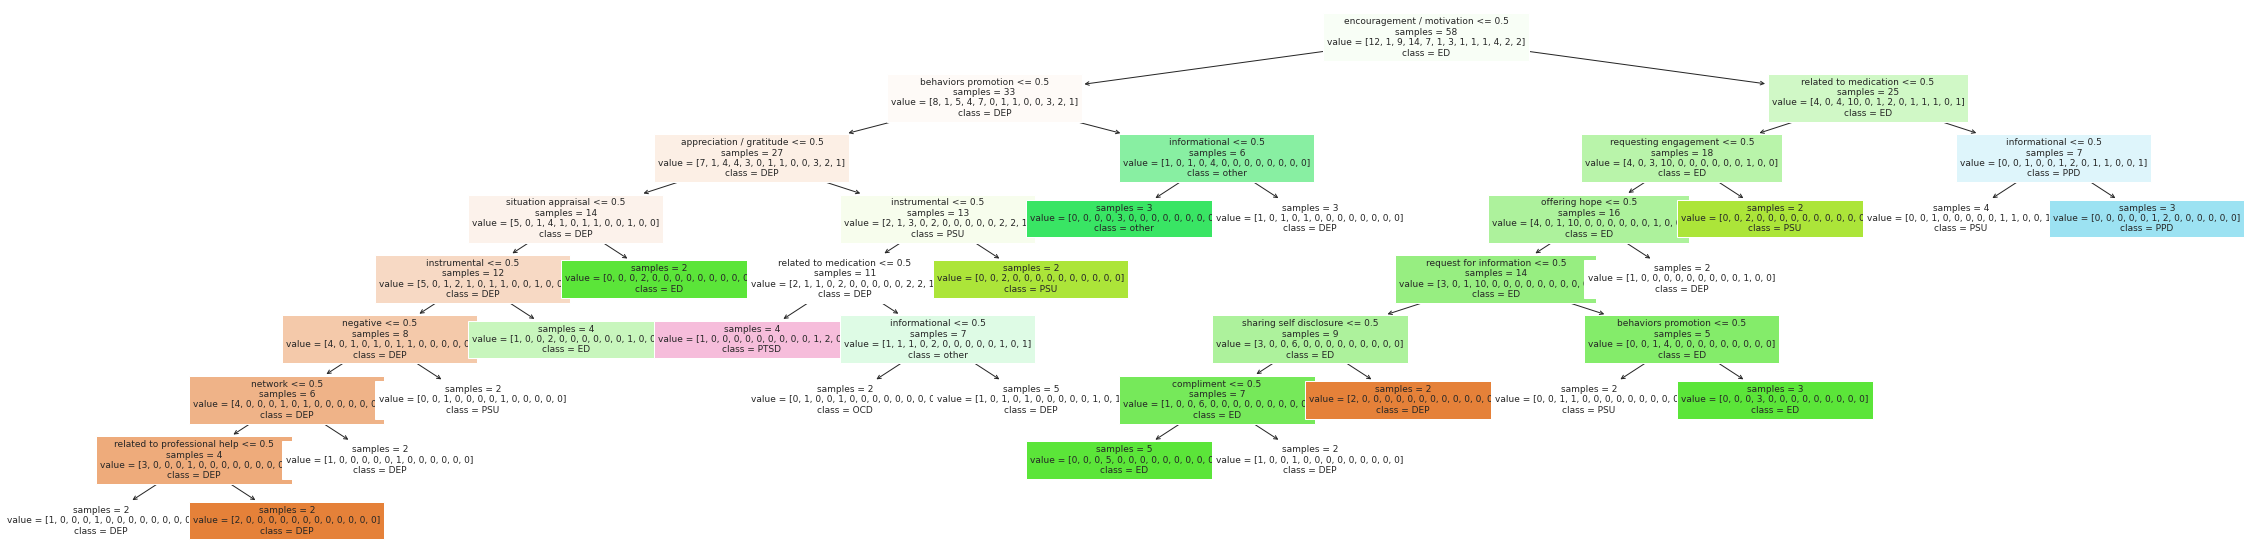

In [ ]:
clf = DecisionTreeClassifier(random_state=1234, min_samples_leaf=2)
clf = clf.fit(X, y)

fig = plt.figure(figsize=(40,10))
_ = tree.plot_tree(clf, 
                   feature_names=col_names,  
                   class_names=class_names,
                   filled=True, 
                   fontsize=9,
                  #  label='none',
                   impurity = False
                   )

tree_text = tree.export_graphviz(clf, feature_names=col_names, class_names=class_names, filled=True, impurity = False)

In [ ]:
tree_text = tree_text.replace("samples", "n")
tree_text = tree_text.replace("class = ", "")
tree_text = tree_text.replace(" <= 0.5", "?")
tree_text

# if '?' => remove all from valuye to end, set color to ffffff
# if not => remove from value to ']' & color change to dict


'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="encouragement / motivation?\\nn = 58\\nvalue = [12, 1, 9, 14, 7, 1, 3, 1, 1, 1, 4, 2, 2]\\nED", fillcolor="#f8fef6"] ;\n1 [label="behaviors promotion?\\nn = 33\\nvalue = [8, 1, 5, 4, 7, 0, 1, 1, 0, 0, 3, 2, 1]\\nDEP", fillcolor="#fefaf7"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="appreciation / gratitude?\\nn = 27\\nvalue = [7, 1, 4, 4, 3, 0, 1, 1, 0, 0, 3, 2, 1]\\nDEP", fillcolor="#fcefe5"] ;\n1 -> 2 ;\n3 [label="situation appraisal?\\nn = 14\\nvalue = [5, 0, 1, 4, 1, 0, 1, 1, 0, 0, 1, 0, 0]\\nDEP", fillcolor="#fcf2eb"] ;\n2 -> 3 ;\n4 [label="instrumental?\\nn = 12\\nvalue = [5, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0]\\nDEP", fillcolor="#f7d9c4"] ;\n3 -> 4 ;\n5 [label="negative?\\nn = 8\\nvalue = [4, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]\\nDEP", fillcolor="#f4c9aa"] ;\n4 -> 5 ;\n6 [label="network?\\nn = 6\\nvalue = [4, 0, 0, 0, 

In [ ]:
clf.score(X,y)

0.5517241379310345

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 0.5517241379310345


In [ ]:
from sklearn.metrics import confusion_matrix

df_confusion = confusion_matrix(y, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


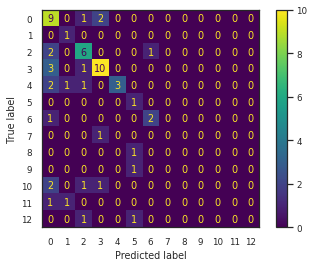

In [ ]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)  
plt.show()  

Text(67.5, 0.5, 'Target class')

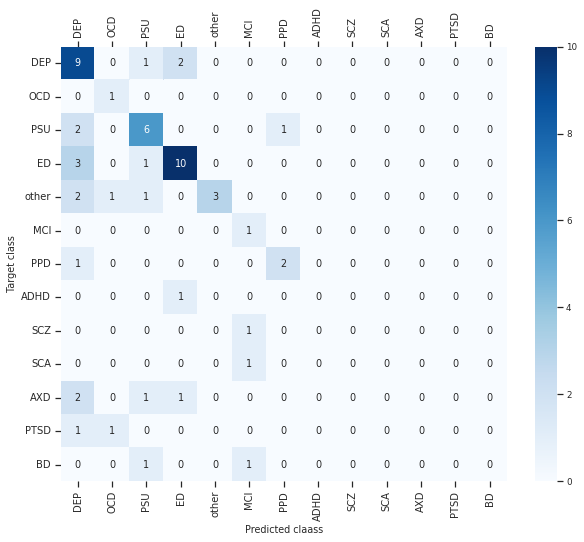

In [ ]:
df_confusion = confusion_matrix(y, y_pred)

labels = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

sns.set(font_scale=0.8, style='white')

plt.subplots(figsize=(10,8))
sns.heatmap(df_confusion.astype('float'),  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")
# sns.heatmap(df_confusion,  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.xlabel('Predicted claass')
plt.ylabel('Target class')

Text(67.5, 0.5, 'Target class')

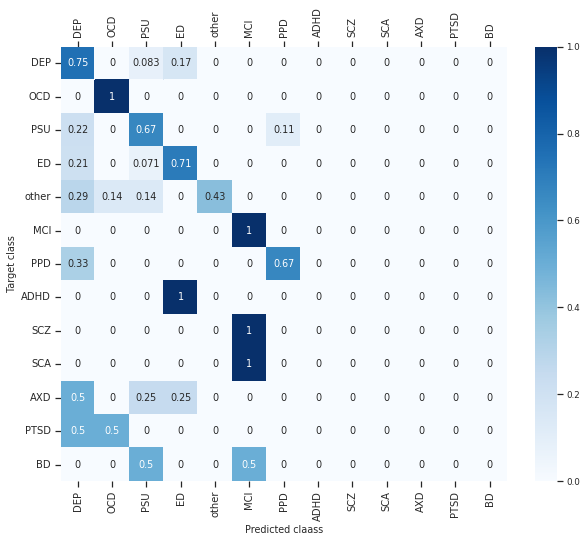

In [ ]:
df_confusion = confusion_matrix(y, y_pred)

labels = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

sns.set(font_scale=0.8, style='white')

plt.subplots(figsize=(10,8))
sns.heatmap(df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis],  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")
# sns.heatmap(df_confusion,  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.xlabel('Predicted claass')
plt.ylabel('Target class')

In [ ]:
y_pred

array([ 0,  0,  0,  1,  2,  2,  3,  4,  5,  6,  7,  3,  4,  2,  0,  3,  6,
        3,  3,  0,  2,  3,  6,  2,  8,  8,  8,  0,  0,  0, 11,  4,  4,  4,
        3,  2,  3,  3,  0,  0])

In [ ]:
y

array([ 0,  0,  0,  1,  2,  2,  3,  4,  5,  6,  7,  3,  4,  2,  0,  3,  6,
        3,  3,  0,  2,  3,  6,  2, 12,  8,  9,  0, 10, 11, 11,  4,  4,  4,
        3,  2,  3,  3,  0, 10])

### logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression().fit(X, y)

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 0.7413793103448276


In [ ]:
clf.intercept_

array([ 2.93509004,  0.38272557,  0.91791293,  3.35905072,  1.90391254,
       -2.2896876 ,  0.51078848, -0.79172947, -2.16820546, -2.16820546,
       -0.37362628, -0.41192574, -1.80610028])

Text(67.5, 0.5, 'Target class')

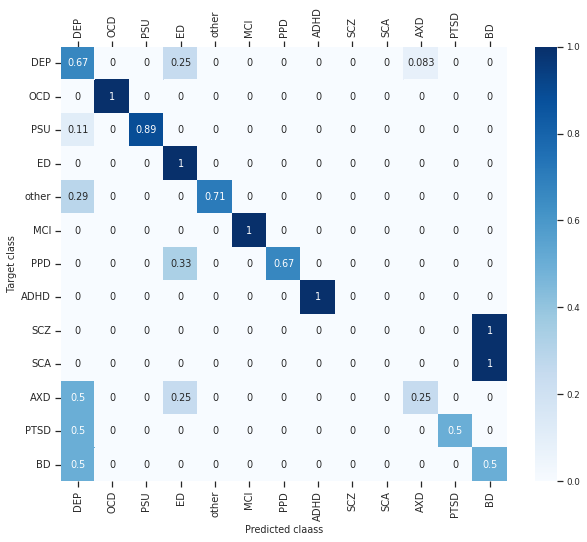

In [ ]:
df_confusion = confusion_matrix(y, y_pred)

labels = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

# sns.set(font_scale=1.2, style='white')

plt.subplots(figsize=(10,8))
sns.heatmap(df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis],  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")
# sns.heatmap(df_confusion,  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.xlabel('Predicted claass')
plt.ylabel('Target class')

### SVM

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(decision_function_shape='ovo')
# clf = svm.LinearSVC(multi_class='ovr')
clf.fit(X, y)

SVC(decision_function_shape='ovo')

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 0.5517241379310345


Text(67.5, 0.5, 'Target class')

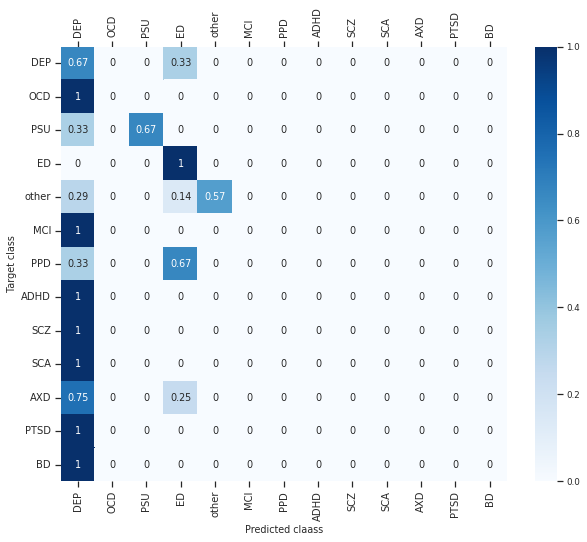

In [ ]:
df_confusion = confusion_matrix(y, y_pred)

labels = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

# sns.set(font_scale=1.2, style='white')

plt.subplots(figsize=(10,8))
sns.heatmap(df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis],  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")
# sns.heatmap(df_confusion,  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.xlabel('Predicted claass')
plt.ylabel('Target class')

### kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn import metrics

for x in range(1,34):
  clf = KNeighborsClassifier(n_neighbors=x)
  clf.fit(X, y)

  y_pred = clf.predict(X)
  print("k=", x, "Accuracy:", metrics.accuracy_score(y, y_pred))

k= 1 Accuracy: 0.8103448275862069
k= 2 Accuracy: 0.5
k= 3 Accuracy: 0.4482758620689655
k= 4 Accuracy: 0.4482758620689655
k= 5 Accuracy: 0.43103448275862066
k= 6 Accuracy: 0.41379310344827586
k= 7 Accuracy: 0.3793103448275862
k= 8 Accuracy: 0.3275862068965517
k= 9 Accuracy: 0.3448275862068966
k= 10 Accuracy: 0.3448275862068966
k= 11 Accuracy: 0.3448275862068966
k= 12 Accuracy: 0.29310344827586204
k= 13 Accuracy: 0.3103448275862069
k= 14 Accuracy: 0.3103448275862069
k= 15 Accuracy: 0.29310344827586204
k= 16 Accuracy: 0.3103448275862069
k= 17 Accuracy: 0.3275862068965517
k= 18 Accuracy: 0.2413793103448276
k= 19 Accuracy: 0.2413793103448276
k= 20 Accuracy: 0.2413793103448276
k= 21 Accuracy: 0.2413793103448276
k= 22 Accuracy: 0.22413793103448276
k= 23 Accuracy: 0.2413793103448276
k= 24 Accuracy: 0.2413793103448276
k= 25 Accuracy: 0.20689655172413793
k= 26 Accuracy: 0.2413793103448276
k= 27 Accuracy: 0.22413793103448276
k= 28 Accuracy: 0.22413793103448276
k= 29 Accuracy: 0.2413793103448276
k

Text(67.5, 0.5, 'Target class')

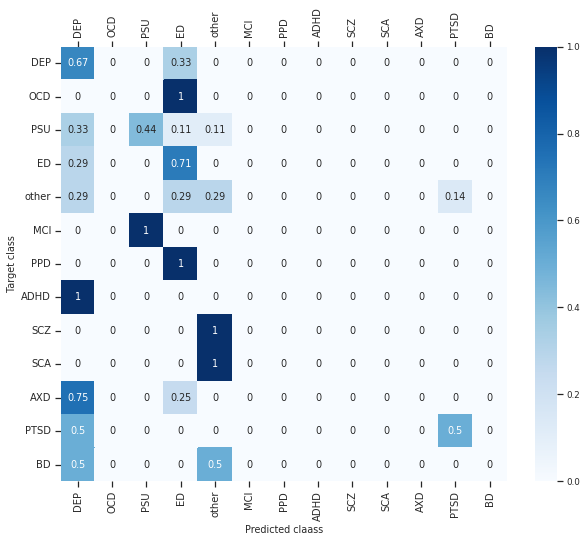

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

y_pred = clf.predict(X)

df_confusion = confusion_matrix(y, y_pred)

labels = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

# sns.set(font_scale=1.2, style='white')

plt.subplots(figsize=(10,8))
sns.heatmap(df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis],  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")
# sns.heatmap(df_confusion,  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.xlabel('Predicted claass')
plt.ylabel('Target class')

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()
clf.fit(X, y)

GaussianNB()

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 0.6206896551724138


Text(67.5, 0.5, 'Target class')

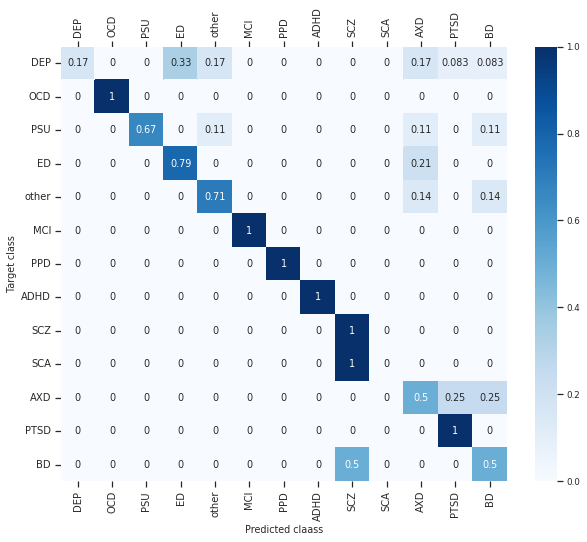

In [ ]:
df_confusion = confusion_matrix(y, y_pred)

labels = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

# sns.set(font_scale=1.2, style='white')

plt.subplots(figsize=(10,8))
sns.heatmap(df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis],  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")
# sns.heatmap(df_confusion,  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.xlabel('Predicted claass')
plt.ylabel('Target class')

## correlations

#### codes - all

In [ ]:
from scipy.stats import pearsonr
import numpy as np

In [ ]:
df = pd.read_csv(path_codes)
df = df.drop(['disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5', 'illness-num'], axis=1)
df.head()

ID  instrumental  tangible  informational  practical tricks  \
0   Andalibi 2017             1         0              1                 0   
1     Barney 2011             0         0              0                 0   
2       Beck 2016             0         1              1                 1   
3  Bronstein 2014             0         0              0                 0   
4      Brown 2014             0         0              1                 1   

   warnings  related to medication  related to professional help  \
0         0                      0                             0   
1         0                      0                             0   
2         0                      0                             0   
3         0                      1                             0   
4         1                      1                             1   

   related to side effects  acceptance  ...  empathy / compassion  \
0                        0           0  ...                     1   
1                        0           0  ...                     0   
2                        0           1  ...                     1   
3                        0           0  ...                     0   
4                        0           0  ...                     0   

   offering hope  request for opinions / suggestions  compliment  \
0              0                                   0           1   
1              0                                   0           0   
2              0                                   1           1   
3              0                                   1           0   
4              0                                   1           0   

   sharing self disclosure  behaviors promotion  referral  sarcastic comments  \
0                        1                    1         1                   0   
1                        1                    0         0                   0   
2                        0                    0         0                   1   
3                        1                    0         0                   0   
4                        0                    1         0                   0   

   disagreement  rejection  
0             0          0  
1             0          0  
2             1          0  
3             0          0  
4             0          1  

[5 rows x 43 columns]

In [ ]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))

(rho.round(2).astype(str) + p).to_csv()

# pearsonr(df['warnings'], df['practical tricks'])

',instrumental,tangible,informational,practical tricks,warnings,related to medication,related to professional help,related to side effects,acceptance,positive,negative,network,encouraging disclosure,requesting engagement,appreciation / gratitude,small talks / socializing,verification the authenticity,relationship,confidentiality,encouragement / motivation,spiritual,situation appraisal,presence / companion,request for other kinds of support,clarifications,apologizing,referring to the rules,agression,reluctance / aversion,tension release / jokes,illegal advices,request for information,empathy / compassion,offering hope,request for opinions / suggestions,compliment,sharing self disclosure,behaviors promotion,referral,sarcastic comments,disagreement,rejection\ninstrumental,1.0***,0.02,0.07,-0.09,-0.13,0.18,-0.03,0.02,0.22,0.42**,0.22,0.15,0.08,0.06,-0.03,0.34**,-0.07,0.06,-0.13,-0.05,-0.02,-0.29*,0.14,0.2,0.13,0.06,0.06,0.42***,0.35**,-0.13,0.13,0.18,-0.02,0.18,-0.05,0.15,0.02,0.03,0.28*,0

#### codes - different disorders + quality

In [ ]:
df = pd.read_csv(path_codes)
df['disorders-v5'].unique()

array(['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'BD',
       'SCZ', 'SZA', 'AXD', 'PTSD'], dtype=object)

In [ ]:
df = pd.read_csv(path_codes)
# df = df[df['disorders-v5'] == 'PSU']
df = df.drop(['disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5', 'illness-num'], axis=1)

high_quality = ['Andalibi 2017', 'Beck 2016', 'Barney 2011', 'Brown 2014', 'Cunningham 2007', 'Greiner 2017', 'Horgan 2013', 'Kantrowitz-Gordon 2013', 'Lord 2016', 'Moore 2016', 'Salzmann-Erikson 2016', 'Struik 2014', 'Walstrom 2000']
df = df[~df['ID'].isin(high_quality)]

print(df.shape)

print(list(df.columns[(df == 0).all()]))
print(list(df.columns[(df == 1).all()]))

(44, 43)
[]
[]


In [ ]:
df.head()

ID  instrumental  tangible  informational  practical tricks  \
3  Bronstein 2014             0         0              0                 0   
5       Chen 2020             0         0              0                 1   
7      Doran 2011             0         0              1                 0   
8     Edward 2012             0         0              0                 1   
9     Eghdam 2018             0         1              1                 1   

   warnings  related to medication  related to professional help  \
3         0                      1                             0   
5         0                      0                             0   
7         0                      0                             1   
8         0                      1                             1   
9         0                      1                             1   

   related to side effects  acceptance  ...  empathy / compassion  \
3                        0           0  ...                     0   
5                        0           0  ...                     1   
7                        0           0  ...                     1   
8                        0           0  ...                     1   
9                        0           0  ...                     1   

   offering hope  request for opinions / suggestions  compliment  \
3              0                                   1           0   
5              0                                   0           0   
7              0                                   0           0   
8              0                                   0           1   
9              0                                   1           1   

   sharing self disclosure  behaviors promotion  referral  sarcastic comments  \
3                        1                    0         0                   0   
5                        1                    0         0                   0   
7                        0                    0         1                   0   
8                        1                    0         0                   0   
9                        1                    0         0                   0   

   disagreement  rejection  
3             0          0  
5             0          0  
7             0          0  
8             0          0  
9             0          0  

[5 rows x 43 columns]

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]
df = df.loc[:, (df != 1).any(axis=0)]

rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))

(rho.round(2).astype(str) + p).to_csv()

',instrumental,tangible,informational,practical tricks,warnings,related to medication,related to professional help,related to side effects,acceptance,positive,negative,network,encouraging disclosure,requesting engagement,appreciation / gratitude,small talks / socializing,verification the authenticity,relationship,confidentiality,encouragement / motivation,spiritual,situation appraisal,presence / companion,request for other kinds of support,clarifications,apologizing,referring to the rules,agression,reluctance / aversion,tension release / jokes,illegal advices,request for information,empathy / compassion,offering hope,request for opinions / suggestions,compliment,sharing self disclosure,behaviors promotion,referral,sarcastic comments,disagreement,rejection\ninstrumental,1.0***,-0.13,0.05,-0.03,-0.09,0.24,0.05,0.0,0.18,0.47**,0.27,0.14,0.09,-0.09,-0.22,0.38*,-0.09,-0.13,-0.16,-0.03,-0.04,-0.31*,0.04,0.19,0.0,0.05,0.05,0.45**,0.26,-0.13,-0.09,0.26,-0.12,0.29,-0.03,0.17,-0.09,-0.03,0.24,0.

#### codes x disorderds

In [ ]:
df = pd.read_csv(path_codes)

one_hot = pd.get_dummies(df['disorders-v5'])
df = df.join(one_hot)

df = df.drop(['disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5', 'illness-num'], axis=1)

high_quality = ['Andalibi 2017', 'Beck 2016', 'Barney 2011', 'Brown 2014', 'Cunningham 2007', 'Greiner 2017', 'Horgan 2013', 'Kantrowitz-Gordon 2013', 'Lord 2016', 'Moore 2016', 'Salzmann-Erikson 2016', 'Struik 2014', 'Walstrom 2000']
df = df[~df['ID'].isin(high_quality)]

print(list(df.columns[(df == 0).all()]))
print(list(df.columns[(df == 1).all()]))

[]
[]


In [ ]:
df.head()

ID  instrumental  tangible  informational  practical tricks  \
3  Bronstein 2014             0         0              0                 0   
5       Chen 2020             0         0              0                 1   
7      Doran 2011             0         0              1                 0   
8     Edward 2012             0         0              0                 1   
9     Eghdam 2018             0         1              1                 1   

   warnings  related to medication  related to professional help  \
3         0                      1                             0   
5         0                      0                             0   
7         0                      0                             1   
8         0                      1                             1   
9         0                      1                             1   

   related to side effects  acceptance  ...  DEP  ED  MCI  OCD  PPD  PSU  \
3                        0           0  ...    0   0    0    1    0    0   
5                        0           0  ...    1   0    0    0    0    0   
7                        0           0  ...    0   1    0    0    0    0   
8                        0           0  ...    0   0    0    0    0    0   
9                        0           0  ...    0   0    1    0    0    0   

   PTSD  SCZ  SZA  other  
3     0    0    0      0  
5     0    0    0      0  
7     0    0    0      0  
8     0    0    0      1  
9     0    0    0      0  

[5 rows x 56 columns]

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]
df = df.loc[:, (df != 1).any(axis=0)]

rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))

(rho.round(2).astype(str) + p).to_csv()

',instrumental,tangible,informational,practical tricks,warnings,related to medication,related to professional help,related to side effects,acceptance,positive,negative,network,encouraging disclosure,requesting engagement,appreciation / gratitude,small talks / socializing,verification the authenticity,relationship,confidentiality,encouragement / motivation,spiritual,situation appraisal,presence / companion,request for other kinds of support,clarifications,apologizing,referring to the rules,agression,reluctance / aversion,tension release / jokes,illegal advices,request for information,empathy / compassion,offering hope,request for opinions / suggestions,compliment,sharing self disclosure,behaviors promotion,referral,sarcastic comments,disagreement,rejection,ADHD,AXD,BD,DEP,ED,MCI,OCD,PPD,PSU,PTSD,SCZ,SZA,other\ninstrumental,1.0***,-0.13,0.05,-0.03,-0.09,0.24,0.05,0.0,0.18,0.47**,0.27,0.14,0.09,-0.09,-0.22,0.38*,-0.09,-0.13,-0.16,-0.03,-0.04,-0.31*,0.04,0.19,0.0,0.05,0.05,0.45**,0.26,-0.1